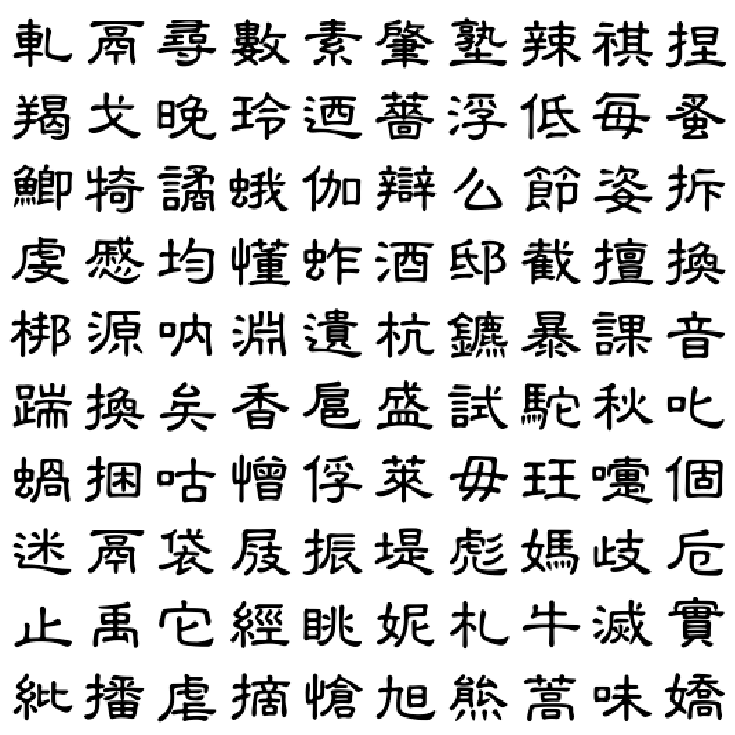

In [6]:
import numpy as np
import matplotlib.pyplot as plt

data = np.load('C:/Users/user/Desktop/研究所/程式/ML/font_data.npy')

fig = plt.figure(figsize=(10,10), dpi=80)
plt.subplots_adjust(0.05,0.05,0.95,0.95,0.1,0.1)
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.axis('off')
    plt.imshow(data[np.random.randint(4808)], cmap='Greys')
plt.show()

In [7]:

import numpy as np
import matplotlib.pyplot as plt

x_train = np.load('font_data.npy')
x_train = x_train/127.5-1.

latent_size = 128
img_shape = (48,48)

from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam

discriminator = Sequential()
discriminator.add(Reshape((np.prod(img_shape),),input_shape=img_shape))
discriminator.add(Dense(512))
discriminator.add(LeakyReLU())
discriminator.add(Dropout(0.3))
discriminator.add(Dense(256))
discriminator.add(LeakyReLU())
discriminator.add(Dropout(0.3))
discriminator.add(Dense(1, activation='sigmoid'))
discriminator.compile(loss='binary_crossentropy',
                      optimizer=Adam(0.0002, 0.5),
                      metrics=['accuracy'])

generator = Sequential()
generator.add(Dense(256, input_dim=latent_size))
generator.add(LeakyReLU())
generator.add(BatchNormalization())
generator.add(Dense(512))
generator.add(LeakyReLU())
generator.add(BatchNormalization())
generator.add(Dense(1024))
generator.add(LeakyReLU())
generator.add(BatchNormalization())
generator.add(Dense(np.prod(img_shape), activation='tanh'))
generator.add(Reshape(img_shape))

noise = Input(shape=(latent_size,))
img = generator(noise)
discriminator.trainable = False
validity = discriminator(img)
combined = Model(noise, validity)
combined.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))

noise_test = np.random.randn(100, latent_size)
batch_size = 64
for epoch in range(20001):
    
    imgs_real = x_train[np.random.randint(0, len(x_train), batch_size)]
    
    noise = np.random.randn(batch_size, latent_size)
    imgs_fake = generator.predict(noise)

    dis_loss_real = discriminator.train_on_batch(imgs_real, np.ones((batch_size,1)))
    dis_loss_fake = discriminator.train_on_batch(imgs_fake, np.zeros((batch_size,1)))
    dis_loss = np.add(dis_loss_real,dis_loss_fake)*0.5

    noise = np.random.randn(batch_size, latent_size)
    gen_loss = combined.train_on_batch(noise, np.ones((batch_size,1)))
                                       
    print("Epoch: %d, discriminator(loss: %.3f, acc.: %.2f%%), generator(loss: %.3f)" %
          (epoch, dis_loss[0], dis_loss[1]*100., gen_loss))

    if epoch % 200 == 0:
        imgs_fake = generator.predict(noise_test)
                                       
        fig = plt.figure(figsize=(10,10), dpi=80)
        plt.subplots_adjust(0.05,0.05,0.95,0.95,0.1,0.1)
        for i in range(100):
            plt.subplot(10,10,i+1)
            plt.axis('off')
            plt.imshow(imgs_fake[i], cmap='Greys')
        fig.suptitle('epoch: %05d' % epoch, color='Blue', fontsize=16)
        fig.savefig("%05d.jpg" % epoch)
        plt.close()

C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch: 0, discriminator(loss: 0.887, acc.: 53.91%), generator(loss: 1.016)
Epoch: 1, discriminator(loss: 0.255, acc.: 98.44%), generator(loss: 0.968)
Epoch: 2, discriminator(loss: 0.226, acc.: 100.00%), generator(loss: 0.834)
Epoch: 3, discriminator(loss: 0.179, acc.: 100.00%), generator(loss: 0.861)
Epoch: 4, discriminator(loss: 0.142, acc.: 100.00%), generator(loss: 0.893)
Epoch: 5, discriminator(loss: 0.122, acc.: 100.00%), generator(loss: 0.880)
Epoch: 6, discriminator(loss: 0.111, acc.: 100.00%), generator(loss: 0.891)
Epoch: 7, discriminator(loss: 0.094, acc.: 100.00%), generator(loss: 0.837)
Epoch: 8, discriminator(loss: 0.090, acc.: 100.00%), generator(loss: 0.854)
Epoch: 9, discriminator(loss: 0.082, acc.: 100.00%), generator(loss: 0.775)
Epoch: 10, discriminator(loss:

Epoch: 95, discriminator(loss: 0.017, acc.: 100.00%), generator(loss: 4.804)
Epoch: 96, discriminator(loss: 0.025, acc.: 100.00%), generator(loss: 4.890)
Epoch: 97, discriminator(loss: 0.025, acc.: 100.00%), generator(loss: 5.125)
Epoch: 98, discriminator(loss: 0.035, acc.: 100.00%), generator(loss: 4.946)
Epoch: 99, discriminator(loss: 0.017, acc.: 100.00%), generator(loss: 5.164)
Epoch: 100, discriminator(loss: 0.019, acc.: 100.00%), generator(loss: 5.282)
Epoch: 101, discriminator(loss: 0.020, acc.: 100.00%), generator(loss: 5.435)
Epoch: 102, discriminator(loss: 0.021, acc.: 100.00%), generator(loss: 5.268)
Epoch: 103, discriminator(loss: 0.014, acc.: 100.00%), generator(loss: 5.138)
Epoch: 104, discriminator(loss: 0.021, acc.: 100.00%), generator(loss: 5.010)
Epoch: 105, discriminator(loss: 0.022, acc.: 100.00%), generator(loss: 5.497)
Epoch: 106, discriminator(loss: 0.013, acc.: 100.00%), generator(loss: 5.280)
Epoch: 107, discriminator(loss: 0.020, acc.: 100.00%), generator(loss

Epoch: 201, discriminator(loss: 0.041, acc.: 97.66%), generator(loss: 14.407)
Epoch: 202, discriminator(loss: 0.001, acc.: 100.00%), generator(loss: 13.871)
Epoch: 203, discriminator(loss: 0.115, acc.: 96.88%), generator(loss: 9.018)
Epoch: 204, discriminator(loss: 0.136, acc.: 93.75%), generator(loss: 8.519)
Epoch: 205, discriminator(loss: 0.041, acc.: 98.44%), generator(loss: 9.690)
Epoch: 206, discriminator(loss: 0.004, acc.: 100.00%), generator(loss: 10.232)
Epoch: 207, discriminator(loss: 0.011, acc.: 100.00%), generator(loss: 8.882)
Epoch: 208, discriminator(loss: 0.013, acc.: 100.00%), generator(loss: 8.851)
Epoch: 209, discriminator(loss: 0.069, acc.: 97.66%), generator(loss: 6.463)
Epoch: 210, discriminator(loss: 0.136, acc.: 93.75%), generator(loss: 8.103)
Epoch: 211, discriminator(loss: 0.035, acc.: 97.66%), generator(loss: 8.258)
Epoch: 212, discriminator(loss: 0.052, acc.: 97.66%), generator(loss: 7.869)
Epoch: 213, discriminator(loss: 0.045, acc.: 99.22%), generator(loss:

Epoch: 309, discriminator(loss: 0.142, acc.: 97.66%), generator(loss: 3.857)
Epoch: 310, discriminator(loss: 0.431, acc.: 79.69%), generator(loss: 2.607)
Epoch: 311, discriminator(loss: 0.120, acc.: 99.22%), generator(loss: 3.718)
Epoch: 312, discriminator(loss: 0.410, acc.: 84.38%), generator(loss: 2.089)
Epoch: 313, discriminator(loss: 0.196, acc.: 90.62%), generator(loss: 3.908)
Epoch: 314, discriminator(loss: 0.975, acc.: 46.09%), generator(loss: 1.263)
Epoch: 315, discriminator(loss: 0.351, acc.: 79.69%), generator(loss: 2.808)
Epoch: 316, discriminator(loss: 0.112, acc.: 99.22%), generator(loss: 4.160)
Epoch: 317, discriminator(loss: 1.282, acc.: 33.59%), generator(loss: 0.448)
Epoch: 318, discriminator(loss: 0.702, acc.: 57.03%), generator(loss: 1.643)
Epoch: 319, discriminator(loss: 0.132, acc.: 96.09%), generator(loss: 3.741)
Epoch: 320, discriminator(loss: 0.253, acc.: 95.31%), generator(loss: 2.445)
Epoch: 321, discriminator(loss: 0.176, acc.: 93.75%), generator(loss: 2.867)

Epoch: 419, discriminator(loss: 0.409, acc.: 82.81%), generator(loss: 1.602)
Epoch: 420, discriminator(loss: 0.388, acc.: 86.72%), generator(loss: 1.669)
Epoch: 421, discriminator(loss: 0.580, acc.: 68.75%), generator(loss: 1.170)
Epoch: 422, discriminator(loss: 0.304, acc.: 90.62%), generator(loss: 1.896)
Epoch: 423, discriminator(loss: 0.715, acc.: 49.22%), generator(loss: 0.822)
Epoch: 424, discriminator(loss: 0.375, acc.: 78.12%), generator(loss: 1.895)
Epoch: 425, discriminator(loss: 0.601, acc.: 60.94%), generator(loss: 1.089)
Epoch: 426, discriminator(loss: 0.300, acc.: 90.62%), generator(loss: 1.858)
Epoch: 427, discriminator(loss: 0.656, acc.: 59.38%), generator(loss: 1.044)
Epoch: 428, discriminator(loss: 0.368, acc.: 82.81%), generator(loss: 1.630)
Epoch: 429, discriminator(loss: 0.480, acc.: 76.56%), generator(loss: 1.363)
Epoch: 430, discriminator(loss: 0.529, acc.: 66.41%), generator(loss: 1.255)
Epoch: 431, discriminator(loss: 0.370, acc.: 88.28%), generator(loss: 1.849)

Epoch: 529, discriminator(loss: 0.448, acc.: 85.16%), generator(loss: 1.180)
Epoch: 530, discriminator(loss: 0.487, acc.: 79.69%), generator(loss: 1.114)
Epoch: 531, discriminator(loss: 0.479, acc.: 82.03%), generator(loss: 1.132)
Epoch: 532, discriminator(loss: 0.477, acc.: 79.69%), generator(loss: 1.199)
Epoch: 533, discriminator(loss: 0.552, acc.: 71.09%), generator(loss: 1.045)
Epoch: 534, discriminator(loss: 0.441, acc.: 85.94%), generator(loss: 1.154)
Epoch: 535, discriminator(loss: 0.487, acc.: 80.47%), generator(loss: 1.124)
Epoch: 536, discriminator(loss: 0.508, acc.: 78.12%), generator(loss: 1.055)
Epoch: 537, discriminator(loss: 0.522, acc.: 74.22%), generator(loss: 1.070)
Epoch: 538, discriminator(loss: 0.438, acc.: 85.16%), generator(loss: 1.181)
Epoch: 539, discriminator(loss: 0.474, acc.: 79.69%), generator(loss: 1.172)
Epoch: 540, discriminator(loss: 0.503, acc.: 74.22%), generator(loss: 1.064)
Epoch: 541, discriminator(loss: 0.500, acc.: 77.34%), generator(loss: 1.106)

Epoch: 639, discriminator(loss: 0.507, acc.: 78.91%), generator(loss: 0.938)
Epoch: 640, discriminator(loss: 0.582, acc.: 71.88%), generator(loss: 0.967)
Epoch: 641, discriminator(loss: 0.550, acc.: 72.66%), generator(loss: 1.034)
Epoch: 642, discriminator(loss: 0.557, acc.: 69.53%), generator(loss: 0.969)
Epoch: 643, discriminator(loss: 0.590, acc.: 71.09%), generator(loss: 1.009)
Epoch: 644, discriminator(loss: 0.562, acc.: 69.53%), generator(loss: 0.987)
Epoch: 645, discriminator(loss: 0.554, acc.: 73.44%), generator(loss: 0.999)
Epoch: 646, discriminator(loss: 0.538, acc.: 75.00%), generator(loss: 0.983)
Epoch: 647, discriminator(loss: 0.528, acc.: 76.56%), generator(loss: 0.996)
Epoch: 648, discriminator(loss: 0.553, acc.: 72.66%), generator(loss: 1.046)
Epoch: 649, discriminator(loss: 0.608, acc.: 65.62%), generator(loss: 0.920)
Epoch: 650, discriminator(loss: 0.526, acc.: 77.34%), generator(loss: 1.008)
Epoch: 651, discriminator(loss: 0.568, acc.: 71.09%), generator(loss: 0.970)

Epoch: 749, discriminator(loss: 0.553, acc.: 71.88%), generator(loss: 0.985)
Epoch: 750, discriminator(loss: 0.556, acc.: 75.00%), generator(loss: 0.973)
Epoch: 751, discriminator(loss: 0.578, acc.: 72.66%), generator(loss: 0.940)
Epoch: 752, discriminator(loss: 0.567, acc.: 73.44%), generator(loss: 0.958)
Epoch: 753, discriminator(loss: 0.548, acc.: 77.34%), generator(loss: 0.972)
Epoch: 754, discriminator(loss: 0.531, acc.: 78.91%), generator(loss: 0.942)
Epoch: 755, discriminator(loss: 0.604, acc.: 64.84%), generator(loss: 1.006)
Epoch: 756, discriminator(loss: 0.538, acc.: 79.69%), generator(loss: 0.978)
Epoch: 757, discriminator(loss: 0.553, acc.: 75.78%), generator(loss: 0.992)
Epoch: 758, discriminator(loss: 0.501, acc.: 81.25%), generator(loss: 1.073)
Epoch: 759, discriminator(loss: 0.566, acc.: 73.44%), generator(loss: 1.001)
Epoch: 760, discriminator(loss: 0.547, acc.: 75.78%), generator(loss: 0.914)
Epoch: 761, discriminator(loss: 0.568, acc.: 67.97%), generator(loss: 0.947)

Epoch: 856, discriminator(loss: 0.530, acc.: 79.69%), generator(loss: 1.039)
Epoch: 857, discriminator(loss: 0.566, acc.: 72.66%), generator(loss: 1.031)
Epoch: 858, discriminator(loss: 0.498, acc.: 83.59%), generator(loss: 0.990)
Epoch: 859, discriminator(loss: 0.527, acc.: 73.44%), generator(loss: 1.092)
Epoch: 860, discriminator(loss: 0.607, acc.: 68.75%), generator(loss: 0.997)
Epoch: 861, discriminator(loss: 0.557, acc.: 69.53%), generator(loss: 1.023)
Epoch: 862, discriminator(loss: 0.574, acc.: 69.53%), generator(loss: 0.983)
Epoch: 863, discriminator(loss: 0.560, acc.: 70.31%), generator(loss: 1.013)
Epoch: 864, discriminator(loss: 0.561, acc.: 75.00%), generator(loss: 1.090)
Epoch: 865, discriminator(loss: 0.585, acc.: 69.53%), generator(loss: 1.056)
Epoch: 866, discriminator(loss: 0.540, acc.: 75.00%), generator(loss: 1.035)
Epoch: 867, discriminator(loss: 0.590, acc.: 64.06%), generator(loss: 1.109)
Epoch: 868, discriminator(loss: 0.580, acc.: 69.53%), generator(loss: 0.967)

Epoch: 966, discriminator(loss: 0.590, acc.: 70.31%), generator(loss: 0.991)
Epoch: 967, discriminator(loss: 0.618, acc.: 64.06%), generator(loss: 0.913)
Epoch: 968, discriminator(loss: 0.567, acc.: 73.44%), generator(loss: 0.998)
Epoch: 969, discriminator(loss: 0.618, acc.: 64.06%), generator(loss: 1.076)
Epoch: 970, discriminator(loss: 0.665, acc.: 60.16%), generator(loss: 1.018)
Epoch: 971, discriminator(loss: 0.586, acc.: 68.75%), generator(loss: 0.930)
Epoch: 972, discriminator(loss: 0.551, acc.: 74.22%), generator(loss: 0.905)
Epoch: 973, discriminator(loss: 0.578, acc.: 67.19%), generator(loss: 1.092)
Epoch: 974, discriminator(loss: 0.619, acc.: 64.06%), generator(loss: 0.987)
Epoch: 975, discriminator(loss: 0.579, acc.: 72.66%), generator(loss: 1.054)
Epoch: 976, discriminator(loss: 0.627, acc.: 61.72%), generator(loss: 0.947)
Epoch: 977, discriminator(loss: 0.593, acc.: 70.31%), generator(loss: 1.067)
Epoch: 978, discriminator(loss: 0.531, acc.: 77.34%), generator(loss: 1.032)

Epoch: 1076, discriminator(loss: 0.506, acc.: 81.25%), generator(loss: 1.012)
Epoch: 1077, discriminator(loss: 0.647, acc.: 61.72%), generator(loss: 0.938)
Epoch: 1078, discriminator(loss: 0.578, acc.: 69.53%), generator(loss: 1.069)
Epoch: 1079, discriminator(loss: 0.623, acc.: 63.28%), generator(loss: 1.053)
Epoch: 1080, discriminator(loss: 0.581, acc.: 74.22%), generator(loss: 1.065)
Epoch: 1081, discriminator(loss: 0.570, acc.: 70.31%), generator(loss: 1.050)
Epoch: 1082, discriminator(loss: 0.609, acc.: 67.19%), generator(loss: 0.937)
Epoch: 1083, discriminator(loss: 0.576, acc.: 71.09%), generator(loss: 1.050)
Epoch: 1084, discriminator(loss: 0.569, acc.: 68.75%), generator(loss: 1.059)
Epoch: 1085, discriminator(loss: 0.599, acc.: 64.84%), generator(loss: 1.076)
Epoch: 1086, discriminator(loss: 0.572, acc.: 70.31%), generator(loss: 1.073)
Epoch: 1087, discriminator(loss: 0.636, acc.: 67.97%), generator(loss: 0.975)
Epoch: 1088, discriminator(loss: 0.592, acc.: 67.19%), generator

Epoch: 1184, discriminator(loss: 0.536, acc.: 75.78%), generator(loss: 1.057)
Epoch: 1185, discriminator(loss: 0.579, acc.: 69.53%), generator(loss: 1.044)
Epoch: 1186, discriminator(loss: 0.588, acc.: 68.75%), generator(loss: 1.101)
Epoch: 1187, discriminator(loss: 0.539, acc.: 75.78%), generator(loss: 1.220)
Epoch: 1188, discriminator(loss: 0.591, acc.: 71.09%), generator(loss: 1.137)
Epoch: 1189, discriminator(loss: 0.562, acc.: 72.66%), generator(loss: 1.176)
Epoch: 1190, discriminator(loss: 0.499, acc.: 78.12%), generator(loss: 1.143)
Epoch: 1191, discriminator(loss: 0.595, acc.: 69.53%), generator(loss: 1.095)
Epoch: 1192, discriminator(loss: 0.662, acc.: 58.59%), generator(loss: 0.955)
Epoch: 1193, discriminator(loss: 0.526, acc.: 73.44%), generator(loss: 1.115)
Epoch: 1194, discriminator(loss: 0.591, acc.: 67.19%), generator(loss: 1.033)
Epoch: 1195, discriminator(loss: 0.567, acc.: 70.31%), generator(loss: 1.054)
Epoch: 1196, discriminator(loss: 0.531, acc.: 71.09%), generator

Epoch: 1290, discriminator(loss: 0.648, acc.: 64.84%), generator(loss: 1.178)
Epoch: 1291, discriminator(loss: 0.586, acc.: 70.31%), generator(loss: 1.097)
Epoch: 1292, discriminator(loss: 0.633, acc.: 64.06%), generator(loss: 0.995)
Epoch: 1293, discriminator(loss: 0.569, acc.: 70.31%), generator(loss: 1.070)
Epoch: 1294, discriminator(loss: 0.699, acc.: 57.81%), generator(loss: 0.965)
Epoch: 1295, discriminator(loss: 0.649, acc.: 60.94%), generator(loss: 1.055)
Epoch: 1296, discriminator(loss: 0.597, acc.: 68.75%), generator(loss: 1.136)
Epoch: 1297, discriminator(loss: 0.675, acc.: 56.25%), generator(loss: 1.022)
Epoch: 1298, discriminator(loss: 0.570, acc.: 66.41%), generator(loss: 1.086)
Epoch: 1299, discriminator(loss: 0.575, acc.: 68.75%), generator(loss: 0.985)
Epoch: 1300, discriminator(loss: 0.631, acc.: 67.19%), generator(loss: 1.022)
Epoch: 1301, discriminator(loss: 0.603, acc.: 69.53%), generator(loss: 0.972)
Epoch: 1302, discriminator(loss: 0.590, acc.: 68.75%), generator

Epoch: 1398, discriminator(loss: 0.580, acc.: 64.84%), generator(loss: 1.109)
Epoch: 1399, discriminator(loss: 0.538, acc.: 72.66%), generator(loss: 1.212)
Epoch: 1400, discriminator(loss: 0.626, acc.: 64.84%), generator(loss: 1.057)
Epoch: 1401, discriminator(loss: 0.590, acc.: 67.97%), generator(loss: 1.100)
Epoch: 1402, discriminator(loss: 0.609, acc.: 70.31%), generator(loss: 1.113)
Epoch: 1403, discriminator(loss: 0.614, acc.: 67.19%), generator(loss: 1.069)
Epoch: 1404, discriminator(loss: 0.544, acc.: 76.56%), generator(loss: 1.070)
Epoch: 1405, discriminator(loss: 0.586, acc.: 65.62%), generator(loss: 1.141)
Epoch: 1406, discriminator(loss: 0.609, acc.: 64.84%), generator(loss: 1.118)
Epoch: 1407, discriminator(loss: 0.625, acc.: 64.06%), generator(loss: 1.056)
Epoch: 1408, discriminator(loss: 0.584, acc.: 73.44%), generator(loss: 0.994)
Epoch: 1409, discriminator(loss: 0.599, acc.: 65.62%), generator(loss: 1.091)
Epoch: 1410, discriminator(loss: 0.664, acc.: 60.94%), generator

Epoch: 1505, discriminator(loss: 0.562, acc.: 72.66%), generator(loss: 1.073)
Epoch: 1506, discriminator(loss: 0.623, acc.: 63.28%), generator(loss: 1.025)
Epoch: 1507, discriminator(loss: 0.578, acc.: 68.75%), generator(loss: 1.163)
Epoch: 1508, discriminator(loss: 0.572, acc.: 71.09%), generator(loss: 1.097)
Epoch: 1509, discriminator(loss: 0.613, acc.: 64.06%), generator(loss: 1.064)
Epoch: 1510, discriminator(loss: 0.587, acc.: 69.53%), generator(loss: 0.992)
Epoch: 1511, discriminator(loss: 0.564, acc.: 67.19%), generator(loss: 1.135)
Epoch: 1512, discriminator(loss: 0.587, acc.: 65.62%), generator(loss: 1.151)
Epoch: 1513, discriminator(loss: 0.580, acc.: 69.53%), generator(loss: 1.117)
Epoch: 1514, discriminator(loss: 0.591, acc.: 71.09%), generator(loss: 1.016)
Epoch: 1515, discriminator(loss: 0.596, acc.: 63.28%), generator(loss: 1.049)
Epoch: 1516, discriminator(loss: 0.623, acc.: 59.38%), generator(loss: 1.075)
Epoch: 1517, discriminator(loss: 0.536, acc.: 71.09%), generator

Epoch: 1611, discriminator(loss: 0.529, acc.: 75.00%), generator(loss: 1.249)
Epoch: 1612, discriminator(loss: 0.595, acc.: 68.75%), generator(loss: 1.147)
Epoch: 1613, discriminator(loss: 0.616, acc.: 63.28%), generator(loss: 1.144)
Epoch: 1614, discriminator(loss: 0.667, acc.: 63.28%), generator(loss: 1.202)
Epoch: 1615, discriminator(loss: 0.491, acc.: 79.69%), generator(loss: 1.336)
Epoch: 1616, discriminator(loss: 0.621, acc.: 68.75%), generator(loss: 1.266)
Epoch: 1617, discriminator(loss: 0.563, acc.: 73.44%), generator(loss: 1.352)
Epoch: 1618, discriminator(loss: 0.577, acc.: 71.09%), generator(loss: 1.231)
Epoch: 1619, discriminator(loss: 0.584, acc.: 69.53%), generator(loss: 1.059)
Epoch: 1620, discriminator(loss: 0.609, acc.: 63.28%), generator(loss: 1.069)
Epoch: 1621, discriminator(loss: 0.668, acc.: 60.16%), generator(loss: 1.111)
Epoch: 1622, discriminator(loss: 0.549, acc.: 68.75%), generator(loss: 1.275)
Epoch: 1623, discriminator(loss: 0.558, acc.: 67.97%), generator

Epoch: 1721, discriminator(loss: 0.616, acc.: 68.75%), generator(loss: 1.096)
Epoch: 1722, discriminator(loss: 0.638, acc.: 57.81%), generator(loss: 1.146)
Epoch: 1723, discriminator(loss: 0.623, acc.: 60.16%), generator(loss: 1.154)
Epoch: 1724, discriminator(loss: 0.584, acc.: 72.66%), generator(loss: 1.143)
Epoch: 1725, discriminator(loss: 0.618, acc.: 65.62%), generator(loss: 1.213)
Epoch: 1726, discriminator(loss: 0.650, acc.: 57.81%), generator(loss: 1.198)
Epoch: 1727, discriminator(loss: 0.612, acc.: 67.19%), generator(loss: 1.257)
Epoch: 1728, discriminator(loss: 0.572, acc.: 67.97%), generator(loss: 1.078)
Epoch: 1729, discriminator(loss: 0.570, acc.: 70.31%), generator(loss: 1.209)
Epoch: 1730, discriminator(loss: 0.596, acc.: 69.53%), generator(loss: 1.065)
Epoch: 1731, discriminator(loss: 0.575, acc.: 65.62%), generator(loss: 1.218)
Epoch: 1732, discriminator(loss: 0.585, acc.: 66.41%), generator(loss: 1.339)
Epoch: 1733, discriminator(loss: 0.596, acc.: 71.09%), generator

Epoch: 1831, discriminator(loss: 0.611, acc.: 65.62%), generator(loss: 1.183)
Epoch: 1832, discriminator(loss: 0.636, acc.: 64.06%), generator(loss: 1.178)
Epoch: 1833, discriminator(loss: 0.633, acc.: 60.94%), generator(loss: 1.290)
Epoch: 1834, discriminator(loss: 0.522, acc.: 73.44%), generator(loss: 1.168)
Epoch: 1835, discriminator(loss: 0.571, acc.: 71.09%), generator(loss: 1.214)
Epoch: 1836, discriminator(loss: 0.628, acc.: 66.41%), generator(loss: 1.186)
Epoch: 1837, discriminator(loss: 0.588, acc.: 71.09%), generator(loss: 1.212)
Epoch: 1838, discriminator(loss: 0.602, acc.: 64.84%), generator(loss: 1.017)
Epoch: 1839, discriminator(loss: 0.556, acc.: 73.44%), generator(loss: 1.088)
Epoch: 1840, discriminator(loss: 0.579, acc.: 68.75%), generator(loss: 1.130)
Epoch: 1841, discriminator(loss: 0.614, acc.: 64.06%), generator(loss: 1.080)
Epoch: 1842, discriminator(loss: 0.635, acc.: 64.06%), generator(loss: 1.122)
Epoch: 1843, discriminator(loss: 0.604, acc.: 64.84%), generator

Epoch: 1939, discriminator(loss: 0.524, acc.: 75.78%), generator(loss: 1.370)
Epoch: 1940, discriminator(loss: 0.665, acc.: 64.84%), generator(loss: 1.441)
Epoch: 1941, discriminator(loss: 0.522, acc.: 75.00%), generator(loss: 1.220)
Epoch: 1942, discriminator(loss: 0.638, acc.: 61.72%), generator(loss: 1.304)
Epoch: 1943, discriminator(loss: 0.651, acc.: 60.16%), generator(loss: 1.132)
Epoch: 1944, discriminator(loss: 0.670, acc.: 63.28%), generator(loss: 1.166)
Epoch: 1945, discriminator(loss: 0.700, acc.: 60.16%), generator(loss: 1.183)
Epoch: 1946, discriminator(loss: 0.535, acc.: 72.66%), generator(loss: 1.228)
Epoch: 1947, discriminator(loss: 0.677, acc.: 64.06%), generator(loss: 1.404)
Epoch: 1948, discriminator(loss: 0.705, acc.: 58.59%), generator(loss: 1.137)
Epoch: 1949, discriminator(loss: 0.533, acc.: 71.09%), generator(loss: 1.178)
Epoch: 1950, discriminator(loss: 0.632, acc.: 60.94%), generator(loss: 1.196)
Epoch: 1951, discriminator(loss: 0.562, acc.: 70.31%), generator

Epoch: 2046, discriminator(loss: 0.615, acc.: 66.41%), generator(loss: 1.180)
Epoch: 2047, discriminator(loss: 0.631, acc.: 61.72%), generator(loss: 1.046)
Epoch: 2048, discriminator(loss: 0.599, acc.: 67.19%), generator(loss: 1.082)
Epoch: 2049, discriminator(loss: 0.569, acc.: 70.31%), generator(loss: 1.368)
Epoch: 2050, discriminator(loss: 0.589, acc.: 69.53%), generator(loss: 1.129)
Epoch: 2051, discriminator(loss: 0.632, acc.: 67.97%), generator(loss: 1.116)
Epoch: 2052, discriminator(loss: 0.610, acc.: 71.88%), generator(loss: 1.120)
Epoch: 2053, discriminator(loss: 0.656, acc.: 63.28%), generator(loss: 1.127)
Epoch: 2054, discriminator(loss: 0.529, acc.: 73.44%), generator(loss: 1.116)
Epoch: 2055, discriminator(loss: 0.648, acc.: 60.94%), generator(loss: 1.087)
Epoch: 2056, discriminator(loss: 0.692, acc.: 63.28%), generator(loss: 0.964)
Epoch: 2057, discriminator(loss: 0.606, acc.: 66.41%), generator(loss: 1.152)
Epoch: 2058, discriminator(loss: 0.617, acc.: 66.41%), generator

Epoch: 2154, discriminator(loss: 0.604, acc.: 65.62%), generator(loss: 1.111)
Epoch: 2155, discriminator(loss: 0.653, acc.: 64.06%), generator(loss: 1.227)
Epoch: 2156, discriminator(loss: 0.589, acc.: 65.62%), generator(loss: 1.089)
Epoch: 2157, discriminator(loss: 0.643, acc.: 60.16%), generator(loss: 1.144)
Epoch: 2158, discriminator(loss: 0.594, acc.: 66.41%), generator(loss: 1.151)
Epoch: 2159, discriminator(loss: 0.593, acc.: 68.75%), generator(loss: 1.187)
Epoch: 2160, discriminator(loss: 0.631, acc.: 62.50%), generator(loss: 1.132)
Epoch: 2161, discriminator(loss: 0.607, acc.: 68.75%), generator(loss: 1.052)
Epoch: 2162, discriminator(loss: 0.652, acc.: 63.28%), generator(loss: 1.141)
Epoch: 2163, discriminator(loss: 0.676, acc.: 57.81%), generator(loss: 1.165)
Epoch: 2164, discriminator(loss: 0.588, acc.: 67.19%), generator(loss: 1.253)
Epoch: 2165, discriminator(loss: 0.632, acc.: 64.06%), generator(loss: 1.239)
Epoch: 2166, discriminator(loss: 0.709, acc.: 57.81%), generator

Epoch: 2261, discriminator(loss: 0.652, acc.: 61.72%), generator(loss: 1.015)
Epoch: 2262, discriminator(loss: 0.619, acc.: 68.75%), generator(loss: 1.054)
Epoch: 2263, discriminator(loss: 0.581, acc.: 66.41%), generator(loss: 1.204)
Epoch: 2264, discriminator(loss: 0.615, acc.: 65.62%), generator(loss: 1.111)
Epoch: 2265, discriminator(loss: 0.682, acc.: 61.72%), generator(loss: 1.079)
Epoch: 2266, discriminator(loss: 0.619, acc.: 64.06%), generator(loss: 1.179)
Epoch: 2267, discriminator(loss: 0.637, acc.: 68.75%), generator(loss: 1.077)
Epoch: 2268, discriminator(loss: 0.670, acc.: 60.16%), generator(loss: 1.146)
Epoch: 2269, discriminator(loss: 0.565, acc.: 70.31%), generator(loss: 1.272)
Epoch: 2270, discriminator(loss: 0.652, acc.: 63.28%), generator(loss: 1.066)
Epoch: 2271, discriminator(loss: 0.688, acc.: 54.69%), generator(loss: 1.031)
Epoch: 2272, discriminator(loss: 0.618, acc.: 67.97%), generator(loss: 1.071)
Epoch: 2273, discriminator(loss: 0.644, acc.: 59.38%), generator

Epoch: 2370, discriminator(loss: 0.626, acc.: 66.41%), generator(loss: 1.200)
Epoch: 2371, discriminator(loss: 0.577, acc.: 69.53%), generator(loss: 1.233)
Epoch: 2372, discriminator(loss: 0.629, acc.: 67.97%), generator(loss: 1.159)
Epoch: 2373, discriminator(loss: 0.564, acc.: 67.97%), generator(loss: 1.130)
Epoch: 2374, discriminator(loss: 0.591, acc.: 66.41%), generator(loss: 1.087)
Epoch: 2375, discriminator(loss: 0.600, acc.: 69.53%), generator(loss: 1.250)
Epoch: 2376, discriminator(loss: 0.543, acc.: 71.09%), generator(loss: 1.119)
Epoch: 2377, discriminator(loss: 0.602, acc.: 63.28%), generator(loss: 1.223)
Epoch: 2378, discriminator(loss: 0.626, acc.: 67.97%), generator(loss: 1.245)
Epoch: 2379, discriminator(loss: 0.651, acc.: 60.94%), generator(loss: 1.228)
Epoch: 2380, discriminator(loss: 0.712, acc.: 55.47%), generator(loss: 1.160)
Epoch: 2381, discriminator(loss: 0.705, acc.: 60.94%), generator(loss: 1.120)
Epoch: 2382, discriminator(loss: 0.531, acc.: 74.22%), generator

Epoch: 2480, discriminator(loss: 0.606, acc.: 67.97%), generator(loss: 1.208)
Epoch: 2481, discriminator(loss: 0.627, acc.: 63.28%), generator(loss: 1.269)
Epoch: 2482, discriminator(loss: 0.544, acc.: 70.31%), generator(loss: 1.199)
Epoch: 2483, discriminator(loss: 0.725, acc.: 57.03%), generator(loss: 1.221)
Epoch: 2484, discriminator(loss: 0.620, acc.: 63.28%), generator(loss: 1.236)
Epoch: 2485, discriminator(loss: 0.625, acc.: 63.28%), generator(loss: 1.208)
Epoch: 2486, discriminator(loss: 0.584, acc.: 68.75%), generator(loss: 1.061)
Epoch: 2487, discriminator(loss: 0.599, acc.: 64.84%), generator(loss: 1.202)
Epoch: 2488, discriminator(loss: 0.655, acc.: 63.28%), generator(loss: 1.055)
Epoch: 2489, discriminator(loss: 0.671, acc.: 59.38%), generator(loss: 1.117)
Epoch: 2490, discriminator(loss: 0.603, acc.: 65.62%), generator(loss: 1.188)
Epoch: 2491, discriminator(loss: 0.635, acc.: 67.97%), generator(loss: 1.234)
Epoch: 2492, discriminator(loss: 0.600, acc.: 67.19%), generator

Epoch: 2589, discriminator(loss: 0.719, acc.: 60.16%), generator(loss: 1.082)
Epoch: 2590, discriminator(loss: 0.572, acc.: 72.66%), generator(loss: 1.167)
Epoch: 2591, discriminator(loss: 0.597, acc.: 67.19%), generator(loss: 1.341)
Epoch: 2592, discriminator(loss: 0.677, acc.: 57.81%), generator(loss: 1.101)
Epoch: 2593, discriminator(loss: 0.617, acc.: 64.06%), generator(loss: 1.232)
Epoch: 2594, discriminator(loss: 0.582, acc.: 67.97%), generator(loss: 1.159)
Epoch: 2595, discriminator(loss: 0.577, acc.: 67.19%), generator(loss: 1.066)
Epoch: 2596, discriminator(loss: 0.610, acc.: 65.62%), generator(loss: 1.179)
Epoch: 2597, discriminator(loss: 0.636, acc.: 67.19%), generator(loss: 1.036)
Epoch: 2598, discriminator(loss: 0.620, acc.: 68.75%), generator(loss: 1.159)
Epoch: 2599, discriminator(loss: 0.651, acc.: 64.06%), generator(loss: 1.197)
Epoch: 2600, discriminator(loss: 0.729, acc.: 57.03%), generator(loss: 1.159)
Epoch: 2601, discriminator(loss: 0.609, acc.: 62.50%), generator

Epoch: 2696, discriminator(loss: 0.654, acc.: 60.94%), generator(loss: 1.288)
Epoch: 2697, discriminator(loss: 0.586, acc.: 66.41%), generator(loss: 1.179)
Epoch: 2698, discriminator(loss: 0.676, acc.: 60.94%), generator(loss: 1.152)
Epoch: 2699, discriminator(loss: 0.633, acc.: 66.41%), generator(loss: 1.070)
Epoch: 2700, discriminator(loss: 0.675, acc.: 60.94%), generator(loss: 1.172)
Epoch: 2701, discriminator(loss: 0.555, acc.: 67.19%), generator(loss: 1.246)
Epoch: 2702, discriminator(loss: 0.631, acc.: 63.28%), generator(loss: 1.195)
Epoch: 2703, discriminator(loss: 0.637, acc.: 66.41%), generator(loss: 1.122)
Epoch: 2704, discriminator(loss: 0.669, acc.: 64.84%), generator(loss: 1.020)
Epoch: 2705, discriminator(loss: 0.660, acc.: 64.06%), generator(loss: 1.177)
Epoch: 2706, discriminator(loss: 0.606, acc.: 67.19%), generator(loss: 1.257)
Epoch: 2707, discriminator(loss: 0.670, acc.: 64.06%), generator(loss: 1.119)
Epoch: 2708, discriminator(loss: 0.594, acc.: 69.53%), generator

Epoch: 2806, discriminator(loss: 0.615, acc.: 65.62%), generator(loss: 1.091)
Epoch: 2807, discriminator(loss: 0.605, acc.: 64.84%), generator(loss: 1.209)
Epoch: 2808, discriminator(loss: 0.597, acc.: 65.62%), generator(loss: 1.037)
Epoch: 2809, discriminator(loss: 0.600, acc.: 66.41%), generator(loss: 1.139)
Epoch: 2810, discriminator(loss: 0.669, acc.: 60.94%), generator(loss: 1.170)
Epoch: 2811, discriminator(loss: 0.629, acc.: 67.97%), generator(loss: 1.176)
Epoch: 2812, discriminator(loss: 0.650, acc.: 58.59%), generator(loss: 1.216)
Epoch: 2813, discriminator(loss: 0.698, acc.: 60.16%), generator(loss: 1.097)
Epoch: 2814, discriminator(loss: 0.745, acc.: 54.69%), generator(loss: 1.039)
Epoch: 2815, discriminator(loss: 0.679, acc.: 60.16%), generator(loss: 1.170)
Epoch: 2816, discriminator(loss: 0.616, acc.: 64.06%), generator(loss: 1.541)
Epoch: 2817, discriminator(loss: 0.651, acc.: 60.94%), generator(loss: 1.114)
Epoch: 2818, discriminator(loss: 0.665, acc.: 59.38%), generator

Epoch: 2913, discriminator(loss: 0.590, acc.: 65.62%), generator(loss: 1.225)
Epoch: 2914, discriminator(loss: 0.642, acc.: 64.06%), generator(loss: 1.068)
Epoch: 2915, discriminator(loss: 0.555, acc.: 72.66%), generator(loss: 1.174)
Epoch: 2916, discriminator(loss: 0.689, acc.: 60.16%), generator(loss: 0.997)
Epoch: 2917, discriminator(loss: 0.653, acc.: 67.97%), generator(loss: 1.041)
Epoch: 2918, discriminator(loss: 0.571, acc.: 71.09%), generator(loss: 1.126)
Epoch: 2919, discriminator(loss: 0.636, acc.: 62.50%), generator(loss: 1.058)
Epoch: 2920, discriminator(loss: 0.609, acc.: 64.06%), generator(loss: 1.117)
Epoch: 2921, discriminator(loss: 0.630, acc.: 67.19%), generator(loss: 1.065)
Epoch: 2922, discriminator(loss: 0.633, acc.: 64.84%), generator(loss: 1.118)
Epoch: 2923, discriminator(loss: 0.567, acc.: 69.53%), generator(loss: 1.208)
Epoch: 2924, discriminator(loss: 0.632, acc.: 70.31%), generator(loss: 1.037)
Epoch: 2925, discriminator(loss: 0.580, acc.: 70.31%), generator

Epoch: 3020, discriminator(loss: 0.648, acc.: 58.59%), generator(loss: 1.204)
Epoch: 3021, discriminator(loss: 0.670, acc.: 63.28%), generator(loss: 1.087)
Epoch: 3022, discriminator(loss: 0.656, acc.: 60.94%), generator(loss: 1.139)
Epoch: 3023, discriminator(loss: 0.617, acc.: 70.31%), generator(loss: 1.322)
Epoch: 3024, discriminator(loss: 0.572, acc.: 69.53%), generator(loss: 1.289)
Epoch: 3025, discriminator(loss: 0.655, acc.: 65.62%), generator(loss: 1.176)
Epoch: 3026, discriminator(loss: 0.651, acc.: 65.62%), generator(loss: 1.117)
Epoch: 3027, discriminator(loss: 0.638, acc.: 64.06%), generator(loss: 1.155)
Epoch: 3028, discriminator(loss: 0.590, acc.: 64.06%), generator(loss: 1.299)
Epoch: 3029, discriminator(loss: 0.668, acc.: 65.62%), generator(loss: 1.133)
Epoch: 3030, discriminator(loss: 0.515, acc.: 76.56%), generator(loss: 1.098)
Epoch: 3031, discriminator(loss: 0.721, acc.: 55.47%), generator(loss: 1.145)
Epoch: 3032, discriminator(loss: 0.619, acc.: 64.06%), generator

Epoch: 3130, discriminator(loss: 0.678, acc.: 58.59%), generator(loss: 1.227)
Epoch: 3131, discriminator(loss: 0.614, acc.: 64.84%), generator(loss: 1.167)
Epoch: 3132, discriminator(loss: 0.571, acc.: 66.41%), generator(loss: 1.211)
Epoch: 3133, discriminator(loss: 0.601, acc.: 70.31%), generator(loss: 1.200)
Epoch: 3134, discriminator(loss: 0.574, acc.: 71.09%), generator(loss: 1.197)
Epoch: 3135, discriminator(loss: 0.689, acc.: 60.16%), generator(loss: 1.108)
Epoch: 3136, discriminator(loss: 0.702, acc.: 59.38%), generator(loss: 1.132)
Epoch: 3137, discriminator(loss: 0.578, acc.: 75.00%), generator(loss: 1.278)
Epoch: 3138, discriminator(loss: 0.722, acc.: 53.91%), generator(loss: 1.260)
Epoch: 3139, discriminator(loss: 0.673, acc.: 64.06%), generator(loss: 1.167)
Epoch: 3140, discriminator(loss: 0.617, acc.: 67.97%), generator(loss: 1.170)
Epoch: 3141, discriminator(loss: 0.665, acc.: 62.50%), generator(loss: 1.314)
Epoch: 3142, discriminator(loss: 0.693, acc.: 60.94%), generator

Epoch: 3236, discriminator(loss: 0.638, acc.: 62.50%), generator(loss: 1.109)
Epoch: 3237, discriminator(loss: 0.627, acc.: 60.94%), generator(loss: 1.166)
Epoch: 3238, discriminator(loss: 0.672, acc.: 64.06%), generator(loss: 1.252)
Epoch: 3239, discriminator(loss: 0.622, acc.: 63.28%), generator(loss: 1.000)
Epoch: 3240, discriminator(loss: 0.654, acc.: 64.84%), generator(loss: 1.142)
Epoch: 3241, discriminator(loss: 0.566, acc.: 67.97%), generator(loss: 1.139)
Epoch: 3242, discriminator(loss: 0.619, acc.: 67.97%), generator(loss: 1.295)
Epoch: 3243, discriminator(loss: 0.619, acc.: 62.50%), generator(loss: 1.096)
Epoch: 3244, discriminator(loss: 0.685, acc.: 60.16%), generator(loss: 1.097)
Epoch: 3245, discriminator(loss: 0.667, acc.: 64.06%), generator(loss: 0.966)
Epoch: 3246, discriminator(loss: 0.640, acc.: 64.84%), generator(loss: 1.172)
Epoch: 3247, discriminator(loss: 0.656, acc.: 62.50%), generator(loss: 1.159)
Epoch: 3248, discriminator(loss: 0.637, acc.: 63.28%), generator

Epoch: 3343, discriminator(loss: 0.647, acc.: 63.28%), generator(loss: 1.115)
Epoch: 3344, discriminator(loss: 0.628, acc.: 67.19%), generator(loss: 1.140)
Epoch: 3345, discriminator(loss: 0.649, acc.: 63.28%), generator(loss: 1.107)
Epoch: 3346, discriminator(loss: 0.575, acc.: 70.31%), generator(loss: 1.119)
Epoch: 3347, discriminator(loss: 0.642, acc.: 59.38%), generator(loss: 1.227)
Epoch: 3348, discriminator(loss: 0.704, acc.: 61.72%), generator(loss: 1.154)
Epoch: 3349, discriminator(loss: 0.653, acc.: 64.84%), generator(loss: 1.245)
Epoch: 3350, discriminator(loss: 0.645, acc.: 60.94%), generator(loss: 1.043)
Epoch: 3351, discriminator(loss: 0.657, acc.: 60.16%), generator(loss: 1.092)
Epoch: 3352, discriminator(loss: 0.650, acc.: 64.06%), generator(loss: 1.337)
Epoch: 3353, discriminator(loss: 0.557, acc.: 71.88%), generator(loss: 1.229)
Epoch: 3354, discriminator(loss: 0.647, acc.: 60.16%), generator(loss: 1.200)
Epoch: 3355, discriminator(loss: 0.729, acc.: 54.69%), generator

Epoch: 3450, discriminator(loss: 0.650, acc.: 66.41%), generator(loss: 1.270)
Epoch: 3451, discriminator(loss: 0.584, acc.: 70.31%), generator(loss: 1.229)
Epoch: 3452, discriminator(loss: 0.637, acc.: 62.50%), generator(loss: 1.132)
Epoch: 3453, discriminator(loss: 0.621, acc.: 62.50%), generator(loss: 1.149)
Epoch: 3454, discriminator(loss: 0.622, acc.: 61.72%), generator(loss: 1.101)
Epoch: 3455, discriminator(loss: 0.658, acc.: 63.28%), generator(loss: 1.243)
Epoch: 3456, discriminator(loss: 0.613, acc.: 65.62%), generator(loss: 1.223)
Epoch: 3457, discriminator(loss: 0.633, acc.: 67.19%), generator(loss: 1.155)
Epoch: 3458, discriminator(loss: 0.625, acc.: 64.06%), generator(loss: 1.003)
Epoch: 3459, discriminator(loss: 0.652, acc.: 60.94%), generator(loss: 1.063)
Epoch: 3460, discriminator(loss: 0.639, acc.: 64.06%), generator(loss: 1.209)
Epoch: 3461, discriminator(loss: 0.640, acc.: 58.59%), generator(loss: 1.072)
Epoch: 3462, discriminator(loss: 0.625, acc.: 63.28%), generator

Epoch: 3557, discriminator(loss: 0.663, acc.: 63.28%), generator(loss: 1.078)
Epoch: 3558, discriminator(loss: 0.613, acc.: 64.84%), generator(loss: 1.125)
Epoch: 3559, discriminator(loss: 0.536, acc.: 74.22%), generator(loss: 1.212)
Epoch: 3560, discriminator(loss: 0.605, acc.: 71.09%), generator(loss: 1.175)
Epoch: 3561, discriminator(loss: 0.650, acc.: 64.84%), generator(loss: 1.140)
Epoch: 3562, discriminator(loss: 0.578, acc.: 68.75%), generator(loss: 1.182)
Epoch: 3563, discriminator(loss: 0.641, acc.: 67.97%), generator(loss: 1.280)
Epoch: 3564, discriminator(loss: 0.667, acc.: 67.97%), generator(loss: 1.067)
Epoch: 3565, discriminator(loss: 0.607, acc.: 69.53%), generator(loss: 1.058)
Epoch: 3566, discriminator(loss: 0.622, acc.: 67.97%), generator(loss: 1.145)
Epoch: 3567, discriminator(loss: 0.698, acc.: 57.81%), generator(loss: 1.131)
Epoch: 3568, discriminator(loss: 0.559, acc.: 72.66%), generator(loss: 1.180)
Epoch: 3569, discriminator(loss: 0.672, acc.: 59.38%), generator

Epoch: 3663, discriminator(loss: 0.617, acc.: 66.41%), generator(loss: 1.096)
Epoch: 3664, discriminator(loss: 0.607, acc.: 67.97%), generator(loss: 1.069)
Epoch: 3665, discriminator(loss: 0.683, acc.: 59.38%), generator(loss: 1.219)
Epoch: 3666, discriminator(loss: 0.686, acc.: 58.59%), generator(loss: 1.032)
Epoch: 3667, discriminator(loss: 0.625, acc.: 63.28%), generator(loss: 1.001)
Epoch: 3668, discriminator(loss: 0.655, acc.: 60.16%), generator(loss: 1.134)
Epoch: 3669, discriminator(loss: 0.538, acc.: 72.66%), generator(loss: 1.100)
Epoch: 3670, discriminator(loss: 0.659, acc.: 57.03%), generator(loss: 1.028)
Epoch: 3671, discriminator(loss: 0.687, acc.: 57.03%), generator(loss: 1.238)
Epoch: 3672, discriminator(loss: 0.545, acc.: 72.66%), generator(loss: 1.290)
Epoch: 3673, discriminator(loss: 0.664, acc.: 60.94%), generator(loss: 1.173)
Epoch: 3674, discriminator(loss: 0.733, acc.: 55.47%), generator(loss: 1.075)
Epoch: 3675, discriminator(loss: 0.633, acc.: 62.50%), generator

Epoch: 3773, discriminator(loss: 0.615, acc.: 67.19%), generator(loss: 1.099)
Epoch: 3774, discriminator(loss: 0.616, acc.: 65.62%), generator(loss: 1.182)
Epoch: 3775, discriminator(loss: 0.653, acc.: 64.06%), generator(loss: 1.147)
Epoch: 3776, discriminator(loss: 0.668, acc.: 59.38%), generator(loss: 1.254)
Epoch: 3777, discriminator(loss: 0.703, acc.: 59.38%), generator(loss: 1.136)
Epoch: 3778, discriminator(loss: 0.670, acc.: 59.38%), generator(loss: 1.131)
Epoch: 3779, discriminator(loss: 0.685, acc.: 60.94%), generator(loss: 1.056)
Epoch: 3780, discriminator(loss: 0.668, acc.: 63.28%), generator(loss: 1.164)
Epoch: 3781, discriminator(loss: 0.633, acc.: 64.06%), generator(loss: 1.216)
Epoch: 3782, discriminator(loss: 0.690, acc.: 59.38%), generator(loss: 1.101)
Epoch: 3783, discriminator(loss: 0.561, acc.: 71.09%), generator(loss: 1.184)
Epoch: 3784, discriminator(loss: 0.679, acc.: 60.16%), generator(loss: 1.073)
Epoch: 3785, discriminator(loss: 0.597, acc.: 67.19%), generator

Epoch: 3883, discriminator(loss: 0.666, acc.: 61.72%), generator(loss: 1.054)
Epoch: 3884, discriminator(loss: 0.594, acc.: 68.75%), generator(loss: 1.144)
Epoch: 3885, discriminator(loss: 0.617, acc.: 67.19%), generator(loss: 1.201)
Epoch: 3886, discriminator(loss: 0.681, acc.: 63.28%), generator(loss: 1.085)
Epoch: 3887, discriminator(loss: 0.705, acc.: 61.72%), generator(loss: 1.201)
Epoch: 3888, discriminator(loss: 0.755, acc.: 55.47%), generator(loss: 1.176)
Epoch: 3889, discriminator(loss: 0.647, acc.: 65.62%), generator(loss: 1.085)
Epoch: 3890, discriminator(loss: 0.637, acc.: 68.75%), generator(loss: 1.116)
Epoch: 3891, discriminator(loss: 0.661, acc.: 57.03%), generator(loss: 1.045)
Epoch: 3892, discriminator(loss: 0.624, acc.: 64.06%), generator(loss: 1.132)
Epoch: 3893, discriminator(loss: 0.726, acc.: 54.69%), generator(loss: 1.238)
Epoch: 3894, discriminator(loss: 0.667, acc.: 62.50%), generator(loss: 1.191)
Epoch: 3895, discriminator(loss: 0.671, acc.: 57.81%), generator

Epoch: 3990, discriminator(loss: 0.721, acc.: 57.81%), generator(loss: 1.190)
Epoch: 3991, discriminator(loss: 0.695, acc.: 57.03%), generator(loss: 1.158)
Epoch: 3992, discriminator(loss: 0.637, acc.: 67.19%), generator(loss: 1.156)
Epoch: 3993, discriminator(loss: 0.599, acc.: 65.62%), generator(loss: 1.034)
Epoch: 3994, discriminator(loss: 0.688, acc.: 56.25%), generator(loss: 1.037)
Epoch: 3995, discriminator(loss: 0.620, acc.: 66.41%), generator(loss: 1.092)
Epoch: 3996, discriminator(loss: 0.605, acc.: 65.62%), generator(loss: 1.165)
Epoch: 3997, discriminator(loss: 0.651, acc.: 62.50%), generator(loss: 1.057)
Epoch: 3998, discriminator(loss: 0.553, acc.: 74.22%), generator(loss: 0.921)
Epoch: 3999, discriminator(loss: 0.629, acc.: 66.41%), generator(loss: 0.918)
Epoch: 4000, discriminator(loss: 0.625, acc.: 67.97%), generator(loss: 1.108)
Epoch: 4001, discriminator(loss: 0.595, acc.: 67.19%), generator(loss: 1.145)
Epoch: 4002, discriminator(loss: 0.617, acc.: 67.19%), generator

Epoch: 4096, discriminator(loss: 0.748, acc.: 57.03%), generator(loss: 1.168)
Epoch: 4097, discriminator(loss: 0.617, acc.: 67.97%), generator(loss: 1.021)
Epoch: 4098, discriminator(loss: 0.626, acc.: 69.53%), generator(loss: 1.021)
Epoch: 4099, discriminator(loss: 0.672, acc.: 60.94%), generator(loss: 0.961)
Epoch: 4100, discriminator(loss: 0.691, acc.: 54.69%), generator(loss: 1.037)
Epoch: 4101, discriminator(loss: 0.703, acc.: 58.59%), generator(loss: 1.167)
Epoch: 4102, discriminator(loss: 0.617, acc.: 66.41%), generator(loss: 1.104)
Epoch: 4103, discriminator(loss: 0.651, acc.: 58.59%), generator(loss: 1.107)
Epoch: 4104, discriminator(loss: 0.670, acc.: 65.62%), generator(loss: 1.105)
Epoch: 4105, discriminator(loss: 0.621, acc.: 64.06%), generator(loss: 1.032)
Epoch: 4106, discriminator(loss: 0.615, acc.: 68.75%), generator(loss: 1.084)
Epoch: 4107, discriminator(loss: 0.735, acc.: 57.03%), generator(loss: 1.099)
Epoch: 4108, discriminator(loss: 0.593, acc.: 68.75%), generator

Epoch: 4206, discriminator(loss: 0.634, acc.: 64.84%), generator(loss: 1.091)
Epoch: 4207, discriminator(loss: 0.644, acc.: 60.94%), generator(loss: 1.151)
Epoch: 4208, discriminator(loss: 0.715, acc.: 57.03%), generator(loss: 1.037)
Epoch: 4209, discriminator(loss: 0.594, acc.: 64.06%), generator(loss: 1.152)
Epoch: 4210, discriminator(loss: 0.679, acc.: 55.47%), generator(loss: 1.073)
Epoch: 4211, discriminator(loss: 0.635, acc.: 57.03%), generator(loss: 1.140)
Epoch: 4212, discriminator(loss: 0.756, acc.: 60.16%), generator(loss: 1.259)
Epoch: 4213, discriminator(loss: 0.628, acc.: 65.62%), generator(loss: 1.125)
Epoch: 4214, discriminator(loss: 0.651, acc.: 64.84%), generator(loss: 0.993)
Epoch: 4215, discriminator(loss: 0.596, acc.: 64.06%), generator(loss: 1.100)
Epoch: 4216, discriminator(loss: 0.629, acc.: 63.28%), generator(loss: 1.112)
Epoch: 4217, discriminator(loss: 0.617, acc.: 68.75%), generator(loss: 1.203)
Epoch: 4218, discriminator(loss: 0.620, acc.: 67.19%), generator

Epoch: 4315, discriminator(loss: 0.628, acc.: 71.88%), generator(loss: 1.186)
Epoch: 4316, discriminator(loss: 0.691, acc.: 56.25%), generator(loss: 1.175)
Epoch: 4317, discriminator(loss: 0.668, acc.: 60.94%), generator(loss: 1.129)
Epoch: 4318, discriminator(loss: 0.622, acc.: 68.75%), generator(loss: 1.128)
Epoch: 4319, discriminator(loss: 0.571, acc.: 73.44%), generator(loss: 1.026)
Epoch: 4320, discriminator(loss: 0.642, acc.: 63.28%), generator(loss: 1.239)
Epoch: 4321, discriminator(loss: 0.527, acc.: 75.78%), generator(loss: 1.212)
Epoch: 4322, discriminator(loss: 0.620, acc.: 64.84%), generator(loss: 1.133)
Epoch: 4323, discriminator(loss: 0.608, acc.: 67.97%), generator(loss: 1.055)
Epoch: 4324, discriminator(loss: 0.633, acc.: 66.41%), generator(loss: 1.237)
Epoch: 4325, discriminator(loss: 0.684, acc.: 60.94%), generator(loss: 1.220)
Epoch: 4326, discriminator(loss: 0.672, acc.: 58.59%), generator(loss: 1.160)
Epoch: 4327, discriminator(loss: 0.637, acc.: 59.38%), generator

Epoch: 4425, discriminator(loss: 0.634, acc.: 67.19%), generator(loss: 1.149)
Epoch: 4426, discriminator(loss: 0.570, acc.: 68.75%), generator(loss: 1.172)
Epoch: 4427, discriminator(loss: 0.634, acc.: 65.62%), generator(loss: 1.302)
Epoch: 4428, discriminator(loss: 0.631, acc.: 66.41%), generator(loss: 1.249)
Epoch: 4429, discriminator(loss: 0.652, acc.: 59.38%), generator(loss: 1.244)
Epoch: 4430, discriminator(loss: 0.589, acc.: 64.06%), generator(loss: 1.099)
Epoch: 4431, discriminator(loss: 0.636, acc.: 63.28%), generator(loss: 1.141)
Epoch: 4432, discriminator(loss: 0.597, acc.: 64.84%), generator(loss: 1.134)
Epoch: 4433, discriminator(loss: 0.591, acc.: 73.44%), generator(loss: 1.199)
Epoch: 4434, discriminator(loss: 0.649, acc.: 67.19%), generator(loss: 1.032)
Epoch: 4435, discriminator(loss: 0.624, acc.: 65.62%), generator(loss: 1.241)
Epoch: 4436, discriminator(loss: 0.565, acc.: 70.31%), generator(loss: 1.145)
Epoch: 4437, discriminator(loss: 0.565, acc.: 67.97%), generator

Epoch: 4535, discriminator(loss: 0.702, acc.: 60.16%), generator(loss: 1.143)
Epoch: 4536, discriminator(loss: 0.613, acc.: 64.84%), generator(loss: 1.112)
Epoch: 4537, discriminator(loss: 0.724, acc.: 52.34%), generator(loss: 1.269)
Epoch: 4538, discriminator(loss: 0.594, acc.: 66.41%), generator(loss: 1.137)
Epoch: 4539, discriminator(loss: 0.626, acc.: 60.94%), generator(loss: 1.190)
Epoch: 4540, discriminator(loss: 0.672, acc.: 60.16%), generator(loss: 1.201)
Epoch: 4541, discriminator(loss: 0.607, acc.: 65.62%), generator(loss: 1.099)
Epoch: 4542, discriminator(loss: 0.640, acc.: 62.50%), generator(loss: 1.139)
Epoch: 4543, discriminator(loss: 0.570, acc.: 75.78%), generator(loss: 1.086)
Epoch: 4544, discriminator(loss: 0.705, acc.: 57.81%), generator(loss: 1.117)
Epoch: 4545, discriminator(loss: 0.634, acc.: 62.50%), generator(loss: 1.151)
Epoch: 4546, discriminator(loss: 0.612, acc.: 66.41%), generator(loss: 1.112)
Epoch: 4547, discriminator(loss: 0.655, acc.: 62.50%), generator

Epoch: 4642, discriminator(loss: 0.618, acc.: 63.28%), generator(loss: 1.156)
Epoch: 4643, discriminator(loss: 0.575, acc.: 71.88%), generator(loss: 1.084)
Epoch: 4644, discriminator(loss: 0.672, acc.: 55.47%), generator(loss: 1.211)
Epoch: 4645, discriminator(loss: 0.591, acc.: 68.75%), generator(loss: 1.119)
Epoch: 4646, discriminator(loss: 0.601, acc.: 64.06%), generator(loss: 1.242)
Epoch: 4647, discriminator(loss: 0.667, acc.: 61.72%), generator(loss: 1.085)
Epoch: 4648, discriminator(loss: 0.572, acc.: 69.53%), generator(loss: 1.141)
Epoch: 4649, discriminator(loss: 0.573, acc.: 69.53%), generator(loss: 1.291)
Epoch: 4650, discriminator(loss: 0.632, acc.: 75.00%), generator(loss: 1.168)
Epoch: 4651, discriminator(loss: 0.702, acc.: 55.47%), generator(loss: 1.160)
Epoch: 4652, discriminator(loss: 0.584, acc.: 73.44%), generator(loss: 1.149)
Epoch: 4653, discriminator(loss: 0.583, acc.: 67.19%), generator(loss: 1.285)
Epoch: 4654, discriminator(loss: 0.638, acc.: 64.84%), generator

Epoch: 4750, discriminator(loss: 0.710, acc.: 54.69%), generator(loss: 1.134)
Epoch: 4751, discriminator(loss: 0.634, acc.: 64.84%), generator(loss: 1.069)
Epoch: 4752, discriminator(loss: 0.622, acc.: 67.19%), generator(loss: 1.166)
Epoch: 4753, discriminator(loss: 0.616, acc.: 63.28%), generator(loss: 1.086)
Epoch: 4754, discriminator(loss: 0.668, acc.: 62.50%), generator(loss: 1.119)
Epoch: 4755, discriminator(loss: 0.619, acc.: 69.53%), generator(loss: 1.143)
Epoch: 4756, discriminator(loss: 0.593, acc.: 71.09%), generator(loss: 1.038)
Epoch: 4757, discriminator(loss: 0.625, acc.: 64.06%), generator(loss: 1.100)
Epoch: 4758, discriminator(loss: 0.631, acc.: 61.72%), generator(loss: 1.164)
Epoch: 4759, discriminator(loss: 0.603, acc.: 64.84%), generator(loss: 1.173)
Epoch: 4760, discriminator(loss: 0.584, acc.: 69.53%), generator(loss: 1.062)
Epoch: 4761, discriminator(loss: 0.684, acc.: 57.81%), generator(loss: 1.164)
Epoch: 4762, discriminator(loss: 0.676, acc.: 59.38%), generator

Epoch: 4856, discriminator(loss: 0.585, acc.: 69.53%), generator(loss: 1.054)
Epoch: 4857, discriminator(loss: 0.672, acc.: 60.16%), generator(loss: 1.294)
Epoch: 4858, discriminator(loss: 0.678, acc.: 64.84%), generator(loss: 1.383)
Epoch: 4859, discriminator(loss: 0.548, acc.: 71.88%), generator(loss: 1.405)
Epoch: 4860, discriminator(loss: 0.624, acc.: 64.84%), generator(loss: 1.299)
Epoch: 4861, discriminator(loss: 0.594, acc.: 70.31%), generator(loss: 1.213)
Epoch: 4862, discriminator(loss: 0.575, acc.: 68.75%), generator(loss: 1.167)
Epoch: 4863, discriminator(loss: 0.576, acc.: 68.75%), generator(loss: 1.285)
Epoch: 4864, discriminator(loss: 0.559, acc.: 74.22%), generator(loss: 1.140)
Epoch: 4865, discriminator(loss: 0.634, acc.: 60.94%), generator(loss: 1.131)
Epoch: 4866, discriminator(loss: 0.682, acc.: 59.38%), generator(loss: 1.164)
Epoch: 4867, discriminator(loss: 0.585, acc.: 64.84%), generator(loss: 1.248)
Epoch: 4868, discriminator(loss: 0.573, acc.: 75.00%), generator

Epoch: 4962, discriminator(loss: 0.603, acc.: 69.53%), generator(loss: 1.108)
Epoch: 4963, discriminator(loss: 0.671, acc.: 60.16%), generator(loss: 1.031)
Epoch: 4964, discriminator(loss: 0.761, acc.: 55.47%), generator(loss: 1.015)
Epoch: 4965, discriminator(loss: 0.630, acc.: 67.19%), generator(loss: 1.195)
Epoch: 4966, discriminator(loss: 0.646, acc.: 60.94%), generator(loss: 1.037)
Epoch: 4967, discriminator(loss: 0.751, acc.: 55.47%), generator(loss: 1.027)
Epoch: 4968, discriminator(loss: 0.689, acc.: 54.69%), generator(loss: 1.122)
Epoch: 4969, discriminator(loss: 0.615, acc.: 61.72%), generator(loss: 1.111)
Epoch: 4970, discriminator(loss: 0.649, acc.: 67.19%), generator(loss: 1.059)
Epoch: 4971, discriminator(loss: 0.559, acc.: 69.53%), generator(loss: 1.188)
Epoch: 4972, discriminator(loss: 0.596, acc.: 67.97%), generator(loss: 1.133)
Epoch: 4973, discriminator(loss: 0.738, acc.: 57.81%), generator(loss: 1.100)
Epoch: 4974, discriminator(loss: 0.633, acc.: 61.72%), generator

Epoch: 5067, discriminator(loss: 0.694, acc.: 61.72%), generator(loss: 1.123)
Epoch: 5068, discriminator(loss: 0.622, acc.: 64.06%), generator(loss: 1.053)
Epoch: 5069, discriminator(loss: 0.574, acc.: 64.84%), generator(loss: 1.111)
Epoch: 5070, discriminator(loss: 0.633, acc.: 64.06%), generator(loss: 1.161)
Epoch: 5071, discriminator(loss: 0.682, acc.: 62.50%), generator(loss: 1.019)
Epoch: 5072, discriminator(loss: 0.706, acc.: 55.47%), generator(loss: 1.141)
Epoch: 5073, discriminator(loss: 0.647, acc.: 67.19%), generator(loss: 1.020)
Epoch: 5074, discriminator(loss: 0.617, acc.: 65.62%), generator(loss: 0.915)
Epoch: 5075, discriminator(loss: 0.602, acc.: 68.75%), generator(loss: 1.014)
Epoch: 5076, discriminator(loss: 0.667, acc.: 61.72%), generator(loss: 1.126)
Epoch: 5077, discriminator(loss: 0.642, acc.: 64.84%), generator(loss: 1.070)
Epoch: 5078, discriminator(loss: 0.626, acc.: 57.81%), generator(loss: 1.008)
Epoch: 5079, discriminator(loss: 0.650, acc.: 61.72%), generator

Epoch: 5175, discriminator(loss: 0.725, acc.: 58.59%), generator(loss: 1.092)
Epoch: 5176, discriminator(loss: 0.582, acc.: 67.19%), generator(loss: 0.980)
Epoch: 5177, discriminator(loss: 0.639, acc.: 64.84%), generator(loss: 1.091)
Epoch: 5178, discriminator(loss: 0.560, acc.: 67.19%), generator(loss: 1.106)
Epoch: 5179, discriminator(loss: 0.723, acc.: 55.47%), generator(loss: 1.110)
Epoch: 5180, discriminator(loss: 0.618, acc.: 64.06%), generator(loss: 1.130)
Epoch: 5181, discriminator(loss: 0.586, acc.: 68.75%), generator(loss: 0.929)
Epoch: 5182, discriminator(loss: 0.677, acc.: 60.94%), generator(loss: 1.058)
Epoch: 5183, discriminator(loss: 0.605, acc.: 64.84%), generator(loss: 1.226)
Epoch: 5184, discriminator(loss: 0.622, acc.: 67.97%), generator(loss: 1.277)
Epoch: 5185, discriminator(loss: 0.770, acc.: 51.56%), generator(loss: 1.178)
Epoch: 5186, discriminator(loss: 0.598, acc.: 65.62%), generator(loss: 1.147)
Epoch: 5187, discriminator(loss: 0.670, acc.: 59.38%), generator

Epoch: 5283, discriminator(loss: 0.658, acc.: 62.50%), generator(loss: 0.995)
Epoch: 5284, discriminator(loss: 0.656, acc.: 68.75%), generator(loss: 1.052)
Epoch: 5285, discriminator(loss: 0.614, acc.: 65.62%), generator(loss: 1.171)
Epoch: 5286, discriminator(loss: 0.694, acc.: 57.81%), generator(loss: 1.153)
Epoch: 5287, discriminator(loss: 0.721, acc.: 55.47%), generator(loss: 1.061)
Epoch: 5288, discriminator(loss: 0.632, acc.: 63.28%), generator(loss: 1.188)
Epoch: 5289, discriminator(loss: 0.626, acc.: 64.06%), generator(loss: 1.205)
Epoch: 5290, discriminator(loss: 0.731, acc.: 52.34%), generator(loss: 1.168)
Epoch: 5291, discriminator(loss: 0.578, acc.: 69.53%), generator(loss: 1.036)
Epoch: 5292, discriminator(loss: 0.635, acc.: 65.62%), generator(loss: 1.111)
Epoch: 5293, discriminator(loss: 0.706, acc.: 54.69%), generator(loss: 1.090)
Epoch: 5294, discriminator(loss: 0.637, acc.: 64.06%), generator(loss: 1.070)
Epoch: 5295, discriminator(loss: 0.655, acc.: 60.94%), generator

Epoch: 5392, discriminator(loss: 0.596, acc.: 67.97%), generator(loss: 1.025)
Epoch: 5393, discriminator(loss: 0.620, acc.: 63.28%), generator(loss: 1.063)
Epoch: 5394, discriminator(loss: 0.586, acc.: 67.97%), generator(loss: 1.159)
Epoch: 5395, discriminator(loss: 0.645, acc.: 61.72%), generator(loss: 1.268)
Epoch: 5396, discriminator(loss: 0.591, acc.: 69.53%), generator(loss: 1.075)
Epoch: 5397, discriminator(loss: 0.663, acc.: 57.03%), generator(loss: 1.079)
Epoch: 5398, discriminator(loss: 0.626, acc.: 66.41%), generator(loss: 1.140)
Epoch: 5399, discriminator(loss: 0.583, acc.: 67.97%), generator(loss: 1.117)
Epoch: 5400, discriminator(loss: 0.639, acc.: 64.06%), generator(loss: 1.160)
Epoch: 5401, discriminator(loss: 0.659, acc.: 67.97%), generator(loss: 1.110)
Epoch: 5402, discriminator(loss: 0.686, acc.: 59.38%), generator(loss: 1.101)
Epoch: 5403, discriminator(loss: 0.626, acc.: 63.28%), generator(loss: 1.161)
Epoch: 5404, discriminator(loss: 0.709, acc.: 55.47%), generator

Epoch: 5498, discriminator(loss: 0.686, acc.: 57.03%), generator(loss: 1.100)
Epoch: 5499, discriminator(loss: 0.590, acc.: 69.53%), generator(loss: 1.022)
Epoch: 5500, discriminator(loss: 0.662, acc.: 64.06%), generator(loss: 1.074)
Epoch: 5501, discriminator(loss: 0.665, acc.: 61.72%), generator(loss: 1.145)
Epoch: 5502, discriminator(loss: 0.676, acc.: 60.16%), generator(loss: 1.120)
Epoch: 5503, discriminator(loss: 0.748, acc.: 53.12%), generator(loss: 1.080)
Epoch: 5504, discriminator(loss: 0.655, acc.: 58.59%), generator(loss: 1.107)
Epoch: 5505, discriminator(loss: 0.632, acc.: 64.06%), generator(loss: 1.140)
Epoch: 5506, discriminator(loss: 0.636, acc.: 60.94%), generator(loss: 1.012)
Epoch: 5507, discriminator(loss: 0.698, acc.: 56.25%), generator(loss: 0.954)
Epoch: 5508, discriminator(loss: 0.591, acc.: 71.09%), generator(loss: 1.152)
Epoch: 5509, discriminator(loss: 0.706, acc.: 61.72%), generator(loss: 0.993)
Epoch: 5510, discriminator(loss: 0.672, acc.: 61.72%), generator

Epoch: 5607, discriminator(loss: 0.672, acc.: 59.38%), generator(loss: 1.053)
Epoch: 5608, discriminator(loss: 0.615, acc.: 62.50%), generator(loss: 0.963)
Epoch: 5609, discriminator(loss: 0.726, acc.: 46.09%), generator(loss: 1.011)
Epoch: 5610, discriminator(loss: 0.564, acc.: 69.53%), generator(loss: 0.987)
Epoch: 5611, discriminator(loss: 0.643, acc.: 60.94%), generator(loss: 1.026)
Epoch: 5612, discriminator(loss: 0.630, acc.: 64.06%), generator(loss: 1.076)
Epoch: 5613, discriminator(loss: 0.603, acc.: 64.84%), generator(loss: 1.118)
Epoch: 5614, discriminator(loss: 0.655, acc.: 63.28%), generator(loss: 1.111)
Epoch: 5615, discriminator(loss: 0.650, acc.: 62.50%), generator(loss: 1.184)
Epoch: 5616, discriminator(loss: 0.681, acc.: 57.03%), generator(loss: 1.105)
Epoch: 5617, discriminator(loss: 0.712, acc.: 57.81%), generator(loss: 0.952)
Epoch: 5618, discriminator(loss: 0.656, acc.: 61.72%), generator(loss: 1.053)
Epoch: 5619, discriminator(loss: 0.629, acc.: 60.94%), generator

Epoch: 5716, discriminator(loss: 0.609, acc.: 65.62%), generator(loss: 1.164)
Epoch: 5717, discriminator(loss: 0.609, acc.: 61.72%), generator(loss: 1.137)
Epoch: 5718, discriminator(loss: 0.631, acc.: 61.72%), generator(loss: 1.118)
Epoch: 5719, discriminator(loss: 0.654, acc.: 64.06%), generator(loss: 1.039)
Epoch: 5720, discriminator(loss: 0.668, acc.: 60.16%), generator(loss: 1.074)
Epoch: 5721, discriminator(loss: 0.585, acc.: 67.19%), generator(loss: 1.161)
Epoch: 5722, discriminator(loss: 0.579, acc.: 69.53%), generator(loss: 1.180)
Epoch: 5723, discriminator(loss: 0.712, acc.: 59.38%), generator(loss: 1.056)
Epoch: 5724, discriminator(loss: 0.576, acc.: 69.53%), generator(loss: 1.108)
Epoch: 5725, discriminator(loss: 0.689, acc.: 60.16%), generator(loss: 1.112)
Epoch: 5726, discriminator(loss: 0.610, acc.: 64.84%), generator(loss: 1.086)
Epoch: 5727, discriminator(loss: 0.607, acc.: 68.75%), generator(loss: 1.131)
Epoch: 5728, discriminator(loss: 0.569, acc.: 68.75%), generator

Epoch: 5826, discriminator(loss: 0.571, acc.: 69.53%), generator(loss: 1.134)
Epoch: 5827, discriminator(loss: 0.643, acc.: 66.41%), generator(loss: 1.102)
Epoch: 5828, discriminator(loss: 0.673, acc.: 54.69%), generator(loss: 1.144)
Epoch: 5829, discriminator(loss: 0.636, acc.: 67.19%), generator(loss: 1.181)
Epoch: 5830, discriminator(loss: 0.671, acc.: 61.72%), generator(loss: 1.181)
Epoch: 5831, discriminator(loss: 0.670, acc.: 56.25%), generator(loss: 1.188)
Epoch: 5832, discriminator(loss: 0.610, acc.: 63.28%), generator(loss: 1.175)
Epoch: 5833, discriminator(loss: 0.659, acc.: 64.84%), generator(loss: 1.135)
Epoch: 5834, discriminator(loss: 0.719, acc.: 58.59%), generator(loss: 1.002)
Epoch: 5835, discriminator(loss: 0.646, acc.: 61.72%), generator(loss: 1.086)
Epoch: 5836, discriminator(loss: 0.605, acc.: 67.19%), generator(loss: 1.144)
Epoch: 5837, discriminator(loss: 0.583, acc.: 67.19%), generator(loss: 0.995)
Epoch: 5838, discriminator(loss: 0.618, acc.: 60.94%), generator

Epoch: 5934, discriminator(loss: 0.655, acc.: 61.72%), generator(loss: 1.090)
Epoch: 5935, discriminator(loss: 0.581, acc.: 70.31%), generator(loss: 1.253)
Epoch: 5936, discriminator(loss: 0.586, acc.: 68.75%), generator(loss: 1.074)
Epoch: 5937, discriminator(loss: 0.685, acc.: 57.81%), generator(loss: 1.055)
Epoch: 5938, discriminator(loss: 0.608, acc.: 63.28%), generator(loss: 1.086)
Epoch: 5939, discriminator(loss: 0.573, acc.: 75.00%), generator(loss: 1.049)
Epoch: 5940, discriminator(loss: 0.631, acc.: 64.84%), generator(loss: 1.169)
Epoch: 5941, discriminator(loss: 0.688, acc.: 60.94%), generator(loss: 1.199)
Epoch: 5942, discriminator(loss: 0.562, acc.: 70.31%), generator(loss: 1.188)
Epoch: 5943, discriminator(loss: 0.590, acc.: 70.31%), generator(loss: 1.099)
Epoch: 5944, discriminator(loss: 0.528, acc.: 78.12%), generator(loss: 0.947)
Epoch: 5945, discriminator(loss: 0.599, acc.: 61.72%), generator(loss: 1.014)
Epoch: 5946, discriminator(loss: 0.655, acc.: 61.72%), generator

Epoch: 6040, discriminator(loss: 0.682, acc.: 53.12%), generator(loss: 1.106)
Epoch: 6041, discriminator(loss: 0.678, acc.: 59.38%), generator(loss: 1.123)
Epoch: 6042, discriminator(loss: 0.649, acc.: 57.03%), generator(loss: 1.133)
Epoch: 6043, discriminator(loss: 0.707, acc.: 53.12%), generator(loss: 0.993)
Epoch: 6044, discriminator(loss: 0.648, acc.: 64.84%), generator(loss: 1.111)
Epoch: 6045, discriminator(loss: 0.685, acc.: 60.94%), generator(loss: 0.994)
Epoch: 6046, discriminator(loss: 0.671, acc.: 59.38%), generator(loss: 1.043)
Epoch: 6047, discriminator(loss: 0.675, acc.: 56.25%), generator(loss: 0.994)
Epoch: 6048, discriminator(loss: 0.674, acc.: 57.81%), generator(loss: 1.024)
Epoch: 6049, discriminator(loss: 0.679, acc.: 61.72%), generator(loss: 1.149)
Epoch: 6050, discriminator(loss: 0.635, acc.: 64.84%), generator(loss: 1.182)
Epoch: 6051, discriminator(loss: 0.696, acc.: 60.94%), generator(loss: 1.066)
Epoch: 6052, discriminator(loss: 0.623, acc.: 64.84%), generator

Epoch: 6149, discriminator(loss: 0.643, acc.: 60.94%), generator(loss: 1.129)
Epoch: 6150, discriminator(loss: 0.762, acc.: 52.34%), generator(loss: 1.099)
Epoch: 6151, discriminator(loss: 0.655, acc.: 61.72%), generator(loss: 1.121)
Epoch: 6152, discriminator(loss: 0.656, acc.: 60.16%), generator(loss: 0.944)
Epoch: 6153, discriminator(loss: 0.698, acc.: 57.03%), generator(loss: 1.059)
Epoch: 6154, discriminator(loss: 0.651, acc.: 61.72%), generator(loss: 0.997)
Epoch: 6155, discriminator(loss: 0.694, acc.: 55.47%), generator(loss: 1.118)
Epoch: 6156, discriminator(loss: 0.597, acc.: 66.41%), generator(loss: 1.148)
Epoch: 6157, discriminator(loss: 0.653, acc.: 60.16%), generator(loss: 1.153)
Epoch: 6158, discriminator(loss: 0.688, acc.: 58.59%), generator(loss: 1.074)
Epoch: 6159, discriminator(loss: 0.656, acc.: 62.50%), generator(loss: 1.067)
Epoch: 6160, discriminator(loss: 0.610, acc.: 65.62%), generator(loss: 1.054)
Epoch: 6161, discriminator(loss: 0.679, acc.: 57.03%), generator

Epoch: 6258, discriminator(loss: 0.610, acc.: 66.41%), generator(loss: 1.050)
Epoch: 6259, discriminator(loss: 0.592, acc.: 64.06%), generator(loss: 1.087)
Epoch: 6260, discriminator(loss: 0.602, acc.: 68.75%), generator(loss: 1.085)
Epoch: 6261, discriminator(loss: 0.622, acc.: 66.41%), generator(loss: 1.057)
Epoch: 6262, discriminator(loss: 0.575, acc.: 68.75%), generator(loss: 1.041)
Epoch: 6263, discriminator(loss: 0.698, acc.: 57.81%), generator(loss: 1.213)
Epoch: 6264, discriminator(loss: 0.598, acc.: 65.62%), generator(loss: 1.033)
Epoch: 6265, discriminator(loss: 0.718, acc.: 54.69%), generator(loss: 1.220)
Epoch: 6266, discriminator(loss: 0.608, acc.: 67.97%), generator(loss: 1.246)
Epoch: 6267, discriminator(loss: 0.701, acc.: 55.47%), generator(loss: 1.121)
Epoch: 6268, discriminator(loss: 0.660, acc.: 60.16%), generator(loss: 1.169)
Epoch: 6269, discriminator(loss: 0.766, acc.: 53.91%), generator(loss: 1.027)
Epoch: 6270, discriminator(loss: 0.712, acc.: 52.34%), generator

Epoch: 6364, discriminator(loss: 0.636, acc.: 59.38%), generator(loss: 1.131)
Epoch: 6365, discriminator(loss: 0.678, acc.: 63.28%), generator(loss: 1.175)
Epoch: 6366, discriminator(loss: 0.653, acc.: 61.72%), generator(loss: 1.134)
Epoch: 6367, discriminator(loss: 0.609, acc.: 61.72%), generator(loss: 0.947)
Epoch: 6368, discriminator(loss: 0.678, acc.: 59.38%), generator(loss: 1.225)
Epoch: 6369, discriminator(loss: 0.696, acc.: 52.34%), generator(loss: 0.985)
Epoch: 6370, discriminator(loss: 0.625, acc.: 70.31%), generator(loss: 0.895)
Epoch: 6371, discriminator(loss: 0.645, acc.: 64.06%), generator(loss: 1.070)
Epoch: 6372, discriminator(loss: 0.570, acc.: 73.44%), generator(loss: 1.092)
Epoch: 6373, discriminator(loss: 0.553, acc.: 70.31%), generator(loss: 1.146)
Epoch: 6374, discriminator(loss: 0.633, acc.: 60.94%), generator(loss: 1.154)
Epoch: 6375, discriminator(loss: 0.640, acc.: 64.84%), generator(loss: 0.951)
Epoch: 6376, discriminator(loss: 0.600, acc.: 67.97%), generator

Epoch: 6472, discriminator(loss: 0.693, acc.: 54.69%), generator(loss: 1.075)
Epoch: 6473, discriminator(loss: 0.570, acc.: 72.66%), generator(loss: 1.057)
Epoch: 6474, discriminator(loss: 0.604, acc.: 65.62%), generator(loss: 1.012)
Epoch: 6475, discriminator(loss: 0.678, acc.: 65.62%), generator(loss: 1.060)
Epoch: 6476, discriminator(loss: 0.588, acc.: 71.88%), generator(loss: 1.214)
Epoch: 6477, discriminator(loss: 0.673, acc.: 58.59%), generator(loss: 1.188)
Epoch: 6478, discriminator(loss: 0.638, acc.: 65.62%), generator(loss: 1.182)
Epoch: 6479, discriminator(loss: 0.581, acc.: 71.09%), generator(loss: 1.223)
Epoch: 6480, discriminator(loss: 0.664, acc.: 62.50%), generator(loss: 1.029)
Epoch: 6481, discriminator(loss: 0.694, acc.: 53.91%), generator(loss: 1.030)
Epoch: 6482, discriminator(loss: 0.651, acc.: 64.84%), generator(loss: 1.028)
Epoch: 6483, discriminator(loss: 0.621, acc.: 69.53%), generator(loss: 1.113)
Epoch: 6484, discriminator(loss: 0.673, acc.: 58.59%), generator

Epoch: 6579, discriminator(loss: 0.697, acc.: 59.38%), generator(loss: 1.045)
Epoch: 6580, discriminator(loss: 0.574, acc.: 72.66%), generator(loss: 1.115)
Epoch: 6581, discriminator(loss: 0.631, acc.: 66.41%), generator(loss: 1.088)
Epoch: 6582, discriminator(loss: 0.581, acc.: 71.88%), generator(loss: 1.172)
Epoch: 6583, discriminator(loss: 0.630, acc.: 63.28%), generator(loss: 1.138)
Epoch: 6584, discriminator(loss: 0.631, acc.: 63.28%), generator(loss: 1.165)
Epoch: 6585, discriminator(loss: 0.694, acc.: 60.16%), generator(loss: 1.191)
Epoch: 6586, discriminator(loss: 0.651, acc.: 62.50%), generator(loss: 1.034)
Epoch: 6587, discriminator(loss: 0.574, acc.: 70.31%), generator(loss: 1.151)
Epoch: 6588, discriminator(loss: 0.587, acc.: 68.75%), generator(loss: 1.117)
Epoch: 6589, discriminator(loss: 0.662, acc.: 64.06%), generator(loss: 1.098)
Epoch: 6590, discriminator(loss: 0.632, acc.: 65.62%), generator(loss: 1.124)
Epoch: 6591, discriminator(loss: 0.703, acc.: 57.81%), generator

Epoch: 6687, discriminator(loss: 0.714, acc.: 56.25%), generator(loss: 1.077)
Epoch: 6688, discriminator(loss: 0.612, acc.: 67.19%), generator(loss: 1.082)
Epoch: 6689, discriminator(loss: 0.704, acc.: 58.59%), generator(loss: 1.015)
Epoch: 6690, discriminator(loss: 0.668, acc.: 69.53%), generator(loss: 1.085)
Epoch: 6691, discriminator(loss: 0.667, acc.: 59.38%), generator(loss: 1.087)
Epoch: 6692, discriminator(loss: 0.641, acc.: 61.72%), generator(loss: 1.027)
Epoch: 6693, discriminator(loss: 0.653, acc.: 62.50%), generator(loss: 1.076)
Epoch: 6694, discriminator(loss: 0.625, acc.: 65.62%), generator(loss: 1.144)
Epoch: 6695, discriminator(loss: 0.555, acc.: 75.00%), generator(loss: 1.110)
Epoch: 6696, discriminator(loss: 0.696, acc.: 59.38%), generator(loss: 1.077)
Epoch: 6697, discriminator(loss: 0.676, acc.: 61.72%), generator(loss: 1.064)
Epoch: 6698, discriminator(loss: 0.690, acc.: 56.25%), generator(loss: 0.970)
Epoch: 6699, discriminator(loss: 0.649, acc.: 63.28%), generator

Epoch: 6795, discriminator(loss: 0.591, acc.: 71.88%), generator(loss: 1.091)
Epoch: 6796, discriminator(loss: 0.616, acc.: 67.19%), generator(loss: 1.130)
Epoch: 6797, discriminator(loss: 0.566, acc.: 67.97%), generator(loss: 1.070)
Epoch: 6798, discriminator(loss: 0.648, acc.: 64.06%), generator(loss: 0.965)
Epoch: 6799, discriminator(loss: 0.655, acc.: 60.94%), generator(loss: 1.093)
Epoch: 6800, discriminator(loss: 0.608, acc.: 71.09%), generator(loss: 1.118)
Epoch: 6801, discriminator(loss: 0.565, acc.: 73.44%), generator(loss: 1.136)
Epoch: 6802, discriminator(loss: 0.579, acc.: 75.00%), generator(loss: 1.086)
Epoch: 6803, discriminator(loss: 0.620, acc.: 65.62%), generator(loss: 1.012)
Epoch: 6804, discriminator(loss: 0.623, acc.: 66.41%), generator(loss: 1.126)
Epoch: 6805, discriminator(loss: 0.569, acc.: 72.66%), generator(loss: 1.092)
Epoch: 6806, discriminator(loss: 0.605, acc.: 66.41%), generator(loss: 1.247)
Epoch: 6807, discriminator(loss: 0.653, acc.: 60.94%), generator

Epoch: 6902, discriminator(loss: 0.620, acc.: 64.06%), generator(loss: 1.190)
Epoch: 6903, discriminator(loss: 0.666, acc.: 66.41%), generator(loss: 1.060)
Epoch: 6904, discriminator(loss: 0.722, acc.: 53.12%), generator(loss: 1.048)
Epoch: 6905, discriminator(loss: 0.669, acc.: 65.62%), generator(loss: 1.046)
Epoch: 6906, discriminator(loss: 0.657, acc.: 59.38%), generator(loss: 1.245)
Epoch: 6907, discriminator(loss: 0.626, acc.: 66.41%), generator(loss: 1.124)
Epoch: 6908, discriminator(loss: 0.648, acc.: 64.06%), generator(loss: 1.037)
Epoch: 6909, discriminator(loss: 0.690, acc.: 57.03%), generator(loss: 1.110)
Epoch: 6910, discriminator(loss: 0.596, acc.: 71.88%), generator(loss: 1.165)
Epoch: 6911, discriminator(loss: 0.629, acc.: 63.28%), generator(loss: 1.107)
Epoch: 6912, discriminator(loss: 0.597, acc.: 67.19%), generator(loss: 1.114)
Epoch: 6913, discriminator(loss: 0.640, acc.: 61.72%), generator(loss: 1.015)
Epoch: 6914, discriminator(loss: 0.671, acc.: 57.03%), generator

Epoch: 7009, discriminator(loss: 0.657, acc.: 61.72%), generator(loss: 1.043)
Epoch: 7010, discriminator(loss: 0.637, acc.: 60.16%), generator(loss: 1.107)
Epoch: 7011, discriminator(loss: 0.602, acc.: 63.28%), generator(loss: 1.118)
Epoch: 7012, discriminator(loss: 0.621, acc.: 61.72%), generator(loss: 1.198)
Epoch: 7013, discriminator(loss: 0.598, acc.: 65.62%), generator(loss: 1.006)
Epoch: 7014, discriminator(loss: 0.617, acc.: 64.06%), generator(loss: 1.113)
Epoch: 7015, discriminator(loss: 0.647, acc.: 60.94%), generator(loss: 1.046)
Epoch: 7016, discriminator(loss: 0.693, acc.: 57.03%), generator(loss: 1.182)
Epoch: 7017, discriminator(loss: 0.690, acc.: 59.38%), generator(loss: 1.048)
Epoch: 7018, discriminator(loss: 0.643, acc.: 64.84%), generator(loss: 1.137)
Epoch: 7019, discriminator(loss: 0.610, acc.: 66.41%), generator(loss: 0.967)
Epoch: 7020, discriminator(loss: 0.624, acc.: 64.84%), generator(loss: 1.068)
Epoch: 7021, discriminator(loss: 0.599, acc.: 64.06%), generator

Epoch: 7119, discriminator(loss: 0.628, acc.: 64.84%), generator(loss: 1.085)
Epoch: 7120, discriminator(loss: 0.672, acc.: 64.06%), generator(loss: 1.047)
Epoch: 7121, discriminator(loss: 0.766, acc.: 52.34%), generator(loss: 1.107)
Epoch: 7122, discriminator(loss: 0.633, acc.: 67.19%), generator(loss: 1.067)
Epoch: 7123, discriminator(loss: 0.683, acc.: 54.69%), generator(loss: 1.083)
Epoch: 7124, discriminator(loss: 0.687, acc.: 62.50%), generator(loss: 1.157)
Epoch: 7125, discriminator(loss: 0.651, acc.: 65.62%), generator(loss: 1.209)
Epoch: 7126, discriminator(loss: 0.683, acc.: 62.50%), generator(loss: 1.122)
Epoch: 7127, discriminator(loss: 0.695, acc.: 61.72%), generator(loss: 0.995)
Epoch: 7128, discriminator(loss: 0.697, acc.: 56.25%), generator(loss: 1.150)
Epoch: 7129, discriminator(loss: 0.688, acc.: 57.03%), generator(loss: 1.039)
Epoch: 7130, discriminator(loss: 0.598, acc.: 64.06%), generator(loss: 1.088)
Epoch: 7131, discriminator(loss: 0.583, acc.: 71.09%), generator

Epoch: 7226, discriminator(loss: 0.694, acc.: 53.91%), generator(loss: 1.045)
Epoch: 7227, discriminator(loss: 0.558, acc.: 73.44%), generator(loss: 1.008)
Epoch: 7228, discriminator(loss: 0.599, acc.: 69.53%), generator(loss: 1.201)
Epoch: 7229, discriminator(loss: 0.618, acc.: 64.06%), generator(loss: 1.131)
Epoch: 7230, discriminator(loss: 0.713, acc.: 56.25%), generator(loss: 1.124)
Epoch: 7231, discriminator(loss: 0.677, acc.: 60.94%), generator(loss: 1.092)
Epoch: 7232, discriminator(loss: 0.717, acc.: 57.81%), generator(loss: 1.200)
Epoch: 7233, discriminator(loss: 0.630, acc.: 67.19%), generator(loss: 1.189)
Epoch: 7234, discriminator(loss: 0.640, acc.: 64.06%), generator(loss: 1.081)
Epoch: 7235, discriminator(loss: 0.673, acc.: 61.72%), generator(loss: 1.102)
Epoch: 7236, discriminator(loss: 0.653, acc.: 58.59%), generator(loss: 1.243)
Epoch: 7237, discriminator(loss: 0.696, acc.: 56.25%), generator(loss: 1.041)
Epoch: 7238, discriminator(loss: 0.637, acc.: 62.50%), generator

Epoch: 7333, discriminator(loss: 0.662, acc.: 57.81%), generator(loss: 1.029)
Epoch: 7334, discriminator(loss: 0.656, acc.: 63.28%), generator(loss: 1.069)
Epoch: 7335, discriminator(loss: 0.632, acc.: 66.41%), generator(loss: 1.084)
Epoch: 7336, discriminator(loss: 0.633, acc.: 62.50%), generator(loss: 1.212)
Epoch: 7337, discriminator(loss: 0.579, acc.: 67.97%), generator(loss: 1.134)
Epoch: 7338, discriminator(loss: 0.681, acc.: 60.16%), generator(loss: 1.013)
Epoch: 7339, discriminator(loss: 0.700, acc.: 52.34%), generator(loss: 1.055)
Epoch: 7340, discriminator(loss: 0.684, acc.: 59.38%), generator(loss: 1.064)
Epoch: 7341, discriminator(loss: 0.698, acc.: 60.16%), generator(loss: 1.028)
Epoch: 7342, discriminator(loss: 0.663, acc.: 66.41%), generator(loss: 1.165)
Epoch: 7343, discriminator(loss: 0.606, acc.: 63.28%), generator(loss: 1.083)
Epoch: 7344, discriminator(loss: 0.677, acc.: 60.94%), generator(loss: 1.085)
Epoch: 7345, discriminator(loss: 0.656, acc.: 57.81%), generator

Epoch: 7441, discriminator(loss: 0.578, acc.: 70.31%), generator(loss: 1.049)
Epoch: 7442, discriminator(loss: 0.653, acc.: 64.06%), generator(loss: 0.989)
Epoch: 7443, discriminator(loss: 0.646, acc.: 64.06%), generator(loss: 1.034)
Epoch: 7444, discriminator(loss: 0.612, acc.: 67.19%), generator(loss: 1.248)
Epoch: 7445, discriminator(loss: 0.597, acc.: 66.41%), generator(loss: 1.099)
Epoch: 7446, discriminator(loss: 0.677, acc.: 59.38%), generator(loss: 0.929)
Epoch: 7447, discriminator(loss: 0.645, acc.: 63.28%), generator(loss: 1.253)
Epoch: 7448, discriminator(loss: 0.660, acc.: 63.28%), generator(loss: 1.158)
Epoch: 7449, discriminator(loss: 0.670, acc.: 62.50%), generator(loss: 1.042)
Epoch: 7450, discriminator(loss: 0.615, acc.: 67.97%), generator(loss: 1.278)
Epoch: 7451, discriminator(loss: 0.577, acc.: 67.19%), generator(loss: 1.162)
Epoch: 7452, discriminator(loss: 0.556, acc.: 71.88%), generator(loss: 1.102)
Epoch: 7453, discriminator(loss: 0.647, acc.: 64.06%), generator

Epoch: 7548, discriminator(loss: 0.618, acc.: 68.75%), generator(loss: 1.192)
Epoch: 7549, discriminator(loss: 0.577, acc.: 74.22%), generator(loss: 1.200)
Epoch: 7550, discriminator(loss: 0.595, acc.: 67.19%), generator(loss: 1.087)
Epoch: 7551, discriminator(loss: 0.613, acc.: 63.28%), generator(loss: 1.161)
Epoch: 7552, discriminator(loss: 0.671, acc.: 60.16%), generator(loss: 1.170)
Epoch: 7553, discriminator(loss: 0.616, acc.: 64.84%), generator(loss: 1.206)
Epoch: 7554, discriminator(loss: 0.640, acc.: 60.94%), generator(loss: 1.128)
Epoch: 7555, discriminator(loss: 0.659, acc.: 63.28%), generator(loss: 1.127)
Epoch: 7556, discriminator(loss: 0.634, acc.: 63.28%), generator(loss: 1.003)
Epoch: 7557, discriminator(loss: 0.626, acc.: 62.50%), generator(loss: 1.104)
Epoch: 7558, discriminator(loss: 0.650, acc.: 61.72%), generator(loss: 1.155)
Epoch: 7559, discriminator(loss: 0.693, acc.: 54.69%), generator(loss: 1.262)
Epoch: 7560, discriminator(loss: 0.646, acc.: 57.81%), generator

Epoch: 7657, discriminator(loss: 0.579, acc.: 69.53%), generator(loss: 1.206)
Epoch: 7658, discriminator(loss: 0.583, acc.: 67.97%), generator(loss: 1.155)
Epoch: 7659, discriminator(loss: 0.634, acc.: 61.72%), generator(loss: 1.162)
Epoch: 7660, discriminator(loss: 0.595, acc.: 69.53%), generator(loss: 1.080)
Epoch: 7661, discriminator(loss: 0.669, acc.: 64.84%), generator(loss: 1.032)
Epoch: 7662, discriminator(loss: 0.643, acc.: 60.16%), generator(loss: 1.016)
Epoch: 7663, discriminator(loss: 0.589, acc.: 66.41%), generator(loss: 1.102)
Epoch: 7664, discriminator(loss: 0.552, acc.: 68.75%), generator(loss: 1.069)
Epoch: 7665, discriminator(loss: 0.590, acc.: 67.97%), generator(loss: 1.099)
Epoch: 7666, discriminator(loss: 0.674, acc.: 57.81%), generator(loss: 1.204)
Epoch: 7667, discriminator(loss: 0.583, acc.: 66.41%), generator(loss: 1.132)
Epoch: 7668, discriminator(loss: 0.555, acc.: 70.31%), generator(loss: 1.166)
Epoch: 7669, discriminator(loss: 0.666, acc.: 60.94%), generator

Epoch: 7765, discriminator(loss: 0.704, acc.: 57.81%), generator(loss: 1.102)
Epoch: 7766, discriminator(loss: 0.649, acc.: 62.50%), generator(loss: 1.052)
Epoch: 7767, discriminator(loss: 0.659, acc.: 62.50%), generator(loss: 0.987)
Epoch: 7768, discriminator(loss: 0.641, acc.: 60.16%), generator(loss: 1.084)
Epoch: 7769, discriminator(loss: 0.715, acc.: 57.03%), generator(loss: 1.034)
Epoch: 7770, discriminator(loss: 0.569, acc.: 68.75%), generator(loss: 1.219)
Epoch: 7771, discriminator(loss: 0.589, acc.: 69.53%), generator(loss: 1.073)
Epoch: 7772, discriminator(loss: 0.581, acc.: 71.88%), generator(loss: 1.148)
Epoch: 7773, discriminator(loss: 0.621, acc.: 67.97%), generator(loss: 1.142)
Epoch: 7774, discriminator(loss: 0.751, acc.: 55.47%), generator(loss: 0.974)
Epoch: 7775, discriminator(loss: 0.649, acc.: 60.94%), generator(loss: 1.025)
Epoch: 7776, discriminator(loss: 0.729, acc.: 57.03%), generator(loss: 0.971)
Epoch: 7777, discriminator(loss: 0.640, acc.: 60.16%), generator

KeyboardInterrupt: 

In [13]:
noise = Input(shape=(100,))

In [14]:
noise

<tf.Tensor 'input_4:0' shape=(?, 100) dtype=float32>

In [17]:
noise = np.random.randn(batch_size, 3)

In [18]:
noise 

array([[-0.9321557 ,  0.03652149,  0.37006694],
       [-0.1219026 , -0.82375714, -0.11419537],
       [-0.34974768, -0.32972548, -0.06249169],
       [ 0.96286218,  0.45486861,  1.44371126],
       [ 1.68506157,  0.88150375,  1.11846293],
       [-0.94547262,  1.51844409, -2.96334228],
       [-0.30647736, -0.75209161, -1.03700286],
       [-1.95252808,  0.11748862, -0.71964998],
       [ 1.03677342, -0.10826139,  0.49525957],
       [ 1.32809853,  0.95517275, -0.21235903],
       [ 0.57485859,  0.39829954, -0.91823343],
       [-0.45287831,  1.00330871, -0.45304861],
       [-0.43450243, -3.56446464,  0.40511714],
       [-0.93879788, -0.663396  , -0.7040008 ],
       [-0.18244128,  0.94404118, -0.09467352],
       [-1.54481632, -0.40086145, -0.67356362],
       [-0.52772941, -0.14977711,  0.56052728],
       [-1.39964081, -2.29162937,  0.20800592],
       [-0.68790133, -0.0228689 , -0.84205574],
       [ 0.58099386,  0.07363217,  0.28110249],
       [-0.3306379 , -0.34719621, -0.222

In [24]:
import numpy as np
import matplotlib.pyplot as plt

x_train = np.load('C:/Users/user/Desktop/研究所/程式/ML/font_data.npy')
x_train = x_train/127.5-1.

latent_size = 128
img_shape = (48,48)

from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam

discriminator = Sequential()
discriminator.add(Reshape(img_shape+(1,), input_shape=img_shape))
discriminator.add(Conv2D(64, kernel_size=5, strides=2, padding='same'))
discriminator.add(LeakyReLU())
discriminator.add(Dropout(0.3))
discriminator.add(Conv2D(128, kernel_size=5, strides=2, padding='same'))
discriminator.add(LeakyReLU())
discriminator.add(Dropout(0.3))
discriminator.add(Flatten())
discriminator.add(Dense(1, activation='sigmoid'))
discriminator.compile(loss='binary_crossentropy',
                      optimizer=Adam(0.0002, 0.5),
                      metrics=['accuracy'])

generator = Sequential()
generator.add(Dense(12*12*256, input_dim=latent_size))
generator.add(BatchNormalization())
generator.add(LeakyReLU())
generator.add(Reshape((12,12,256)))
generator.add(Conv2DTranspose(128, kernel_size=5, strides=1, padding='same'))
generator.add(BatchNormalization())
generator.add(LeakyReLU())
generator.add(Conv2DTranspose(64, kernel_size=5, strides=2, padding='same'))
generator.add(BatchNormalization())
generator.add(LeakyReLU())
generator.add(Conv2DTranspose(1, kernel_size=5, strides=2, padding='same', activation='tanh'))
generator.add(Reshape(img_shape))

noise = Input(shape=(latent_size,))
img = generator(noise)
discriminator.trainable = False
validity = discriminator(img)
combined = Model(noise, validity)
combined.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))

noise_test = np.random.randn(100, latent_size)
batch_size = 64
for epoch in range(10001):
    
    imgs_real = x_train[np.random.randint(0, len(x_train), batch_size)]
    
    noise = np.random.randn(batch_size, latent_size)
    imgs_fake = generator.predict(noise)

    dis_loss_real = discriminator.train_on_batch(imgs_real, np.ones((batch_size,1)))
    dis_loss_fake = discriminator.train_on_batch(imgs_fake, np.zeros((batch_size,1)))
    dis_loss = np.add(dis_loss_real,dis_loss_fake)*0.5

    noise = np.random.randn(batch_size, latent_size)
    gen_loss = combined.train_on_batch(noise, np.ones((batch_size,1)))
                                       
    print("Epoch: %d, discriminator(loss: %.3f, acc.: %.2f%%), generator(loss: %.3f)" %
          (epoch, dis_loss[0], dis_loss[1]*100., gen_loss))

    if epoch % 100 == 0:
        imgs_fake = generator.predict(noise_test)
                                       
        fig = plt.figure(figsize=(10,10), dpi=80)
        plt.subplots_adjust(0.05,0.05,0.95,0.95,0.1,0.1)
        for i in range(100):
            plt.subplot(10,10,i+1)
            plt.axis('off')
            plt.imshow(imgs_fake[i], cmap='Greys')
        fig.suptitle('epoch: %05d' % epoch, color='Blue', fontsize=16)
        fig.savefig("%05d.jpg" % epoch)
        plt.close()

Epoch: 0, discriminator(loss: 0.680, acc.: 30.47%), generator(loss: 0.648)
Epoch: 1, discriminator(loss: 0.574, acc.: 50.00%), generator(loss: 0.563)
Epoch: 2, discriminator(loss: 0.506, acc.: 50.00%), generator(loss: 0.463)
Epoch: 3, discriminator(loss: 0.452, acc.: 50.00%), generator(loss: 0.363)
Epoch: 4, discriminator(loss: 0.412, acc.: 50.00%), generator(loss: 0.276)
Epoch: 5, discriminator(loss: 0.388, acc.: 50.00%), generator(loss: 0.211)
Epoch: 6, discriminator(loss: 0.371, acc.: 58.59%), generator(loss: 0.163)
Epoch: 7, discriminator(loss: 0.358, acc.: 100.00%), generator(loss: 0.131)
Epoch: 8, discriminator(loss: 0.350, acc.: 100.00%), generator(loss: 0.108)
Epoch: 9, discriminator(loss: 0.344, acc.: 100.00%), generator(loss: 0.089)
Epoch: 10, discriminator(loss: 0.343, acc.: 100.00%), generator(loss: 0.078)
Epoch: 11, discriminator(loss: 0.345, acc.: 98.44%), generator(loss: 0.076)
Epoch: 12, discriminator(loss: 0.350, acc.: 71.88%), generator(loss: 0.077)
Epoch: 13, discrim

Epoch: 103, discriminator(loss: 0.068, acc.: 96.88%), generator(loss: 0.000)
Epoch: 104, discriminator(loss: 0.008, acc.: 100.00%), generator(loss: 0.001)
Epoch: 105, discriminator(loss: 0.044, acc.: 98.44%), generator(loss: 0.000)
Epoch: 106, discriminator(loss: 0.068, acc.: 99.22%), generator(loss: 0.000)
Epoch: 107, discriminator(loss: 0.005, acc.: 100.00%), generator(loss: 0.000)
Epoch: 108, discriminator(loss: 0.000, acc.: 100.00%), generator(loss: 0.000)
Epoch: 109, discriminator(loss: 0.058, acc.: 98.44%), generator(loss: 0.000)
Epoch: 110, discriminator(loss: 0.008, acc.: 100.00%), generator(loss: 0.000)
Epoch: 111, discriminator(loss: 0.045, acc.: 98.44%), generator(loss: 0.000)
Epoch: 112, discriminator(loss: 0.067, acc.: 99.22%), generator(loss: 0.000)
Epoch: 113, discriminator(loss: 0.001, acc.: 100.00%), generator(loss: 0.000)
Epoch: 114, discriminator(loss: 0.025, acc.: 99.22%), generator(loss: 0.000)
Epoch: 115, discriminator(loss: 0.001, acc.: 100.00%), generator(loss: 

Epoch: 209, discriminator(loss: 0.001, acc.: 100.00%), generator(loss: 0.001)
Epoch: 210, discriminator(loss: 0.001, acc.: 100.00%), generator(loss: 0.000)
Epoch: 211, discriminator(loss: 0.001, acc.: 100.00%), generator(loss: 0.000)
Epoch: 212, discriminator(loss: 0.001, acc.: 100.00%), generator(loss: 0.000)
Epoch: 213, discriminator(loss: 0.001, acc.: 100.00%), generator(loss: 0.000)
Epoch: 214, discriminator(loss: 0.000, acc.: 100.00%), generator(loss: 0.000)
Epoch: 215, discriminator(loss: 0.001, acc.: 100.00%), generator(loss: 0.000)
Epoch: 216, discriminator(loss: 0.001, acc.: 100.00%), generator(loss: 0.001)
Epoch: 217, discriminator(loss: 0.001, acc.: 100.00%), generator(loss: 0.000)
Epoch: 218, discriminator(loss: 0.000, acc.: 100.00%), generator(loss: 0.001)
Epoch: 219, discriminator(loss: 0.001, acc.: 100.00%), generator(loss: 0.000)
Epoch: 220, discriminator(loss: 0.000, acc.: 100.00%), generator(loss: 0.001)
Epoch: 221, discriminator(loss: 0.001, acc.: 100.00%), generator

KeyboardInterrupt: 

In [23]:
(2,2)+(3,)

(2, 2, 3)

In [26]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Reshape, Dense

def image_generation(x_test, W1, W2, W3, B1, B2, B3):
    y_predict = np.zeros((100,14,14))
    ### START YOUR CODE HERE ###
    
    img_shape=(14,14)
    generator = Sequential()
    
    generator.add(Dense(64,activation='relu',input_dim=32))    
    generator.add(Dense(128,activation='relu'))
    generator.add(Dense(np.prod(img_shape), activation='tanh'))
    generator.add(Reshape(img_shape))
    
    generator.layers[0].set_weights([W1,B1])
    generator.layers[1].set_weights([W2,B2])
    generator.layers[2].set_weights([W3,B3])
    
    y_predict=generator.predict(x_test)
      
    
    #### END YOUR CODE HERE ####
    return y_predict


In [35]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Reshape, Dense

def image_discrimination(x_train, x_test, W1, W2, W3, W4, W5, B1, B2, B3, B4, B5):
    score = np.zeros((2,100))
    ### START YOUR CODE HERE ###
    
    y_predict = np.zeros((100,14,14))   
    img_shape=(14,14)
    generator = Sequential()
    
    generator.add(Dense(64,activation='relu',input_dim=32))    
    generator.add(Dense(128,activation='relu'))
    generator.add(Dense(np.prod(img_shape), activation='tanh'))
    generator.add(Reshape(img_shape))
    
    generator.layers[0].set_weights([W1,B1])
    generator.layers[1].set_weights([W2,B2])
    generator.layers[2].set_weights([W3,B3])
    y_predict=generator.predict(x_test)
    
    
    discriminator = Sequential()
    discriminator.add(Reshape((np.prod(img_shape),),input_shape=img_shape))
    discriminator.add(Dense(64,activation='relu'))
    discriminator.add(Dense(1, activation='sigmoid'))

    discriminator.layers[1].set_weights([W4,B4])
    discriminator.layers[2].set_weights([W5,B5])
    
    score[0]=discriminator.predict(y_predict)[:,0]
    score[1]=discriminator.predict(x_train)[:,0]
    
    
    
    #### END YOUR CODE HERE ####
    return score


In [39]:
np.prod((14,14))

196

In [33]:
np.prod(img_shape)

2304

In [45]:
np.array([[1],[0],[11],[10],[9],[5]])[:,0]

array([ 1,  0, 11, 10,  9,  5])

In [49]:
np.array([[1],[0],[11],[10],[9],[5]])

array([[ 1],
       [ 0],
       [11],
       [10],
       [ 9],
       [ 5]])

In [54]:
A=np.array([[1],[0],[11],[10],[9],[5]])

In [46]:
#HW1

In [47]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Reshape, Dense

def image_generation(x_test, W1, W2, W3, B1, B2, B3):
    y_predict = np.zeros((100,14,14))
    ### START YOUR CODE HERE ###
    
    img_shape=(14,14)
    generator = Sequential()
    
    generator.add(Dense(64,activation='relu',input_dim=32))    
    generator.add(Dense(128,activation='relu'))
    generator.add(Dense(np.prod(img_shape), activation='tanh'))
    generator.add(Reshape(img_shape))
    
    generator.layers[0].set_weights([W1,B1])
    generator.layers[1].set_weights([W2,B2])
    generator.layers[2].set_weights([W3,B3])
    
    y_predict=generator.predict(x_test)
      
    
    #### END YOUR CODE HERE ####
    return y_predict


In [ ]:
#HW2

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Reshape, Dense

def image_discrimination(x_train, x_test, W1, W2, W3, W4, W5, B1, B2, B3, B4, B5):
    score = np.zeros((2,100))
    ### START YOUR CODE HERE ###
    
    y_predict = np.zeros((100,14,14))   
    img_shape=(14,14)
    generator = Sequential()
    
    generator.add(Dense(64,activation='relu',input_dim=32))    
    generator.add(Dense(128,activation='relu'))
    generator.add(Dense(np.prod(img_shape), activation='tanh'))
    generator.add(Reshape(img_shape))
    
    generator.layers[0].set_weights([W1,B1])
    generator.layers[1].set_weights([W2,B2])
    generator.layers[2].set_weights([W3,B3])
    y_predict=generator.predict(x_test)
    
    
    discriminator = Sequential()
    discriminator.add(Reshape((np.prod(img_shape),),input_shape=img_shape))
    discriminator.add(Dense(64,activation='relu'))
    discriminator.add(Dense(1, activation='sigmoid'))

    discriminator.layers[1].set_weights([W4,B4])
    discriminator.layers[2].set_weights([W5,B5])
    
    score[0]=discriminator.predict(y_predict)[:,0]
    score[1]=discriminator.predict(x_train)[:,0]
    
    
    
    #### END YOUR CODE HERE ####
    return score
